In [1]:
import numpy as np
import cv2 as cv
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

ia=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/bad' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ia.append(img_array)
print(ia)  
    #img_array=(img_array.flatten())
    #img_array=img_array.reshape(-1,1).T/255 # Each pixel value ranges from 0-255 
    #imv=cv.imshow('img',img_array)
   #plt.imshow(img_array, cmap='gray') 
   #plt.show
   #print(img_array)
  # with open('imgshoulder.csv','ab' ) as f:
        #np.savetxt(f, img_array, delimiter=',')

[array([[[226, 229, 227],
        [136, 137, 135],
        [126, 120, 121],
        ...,
        [146, 135, 137],
        [152, 138, 140],
        [130, 116, 118]],

       [[230, 237, 234],
        [168, 173, 171],
        [184, 182, 182],
        ...,
        [139, 133, 134],
        [144, 136, 137],
        [133, 122, 124]],

       [[227, 244, 241],
        [205, 219, 217],
        [230, 238, 237],
        ...,
        [134, 136, 137],
        [139, 139, 139],
        [144, 142, 142]],

       ...,

       [[ 86, 100,  99],
        [ 89, 103, 102],
        [ 98, 108, 108],
        ...,
        [160, 174, 172],
        [232, 244, 244],
        [147, 159, 159]],

       [[ 56,  72,  71],
        [ 75,  91,  90],
        [ 99, 111, 111],
        ...,
        [162, 176, 174],
        [236, 249, 247],
        [144, 157, 155]],

       [[ 45,  63,  62],
        [ 61,  77,  76],
        [ 73,  85,  85],
        ...,
        [153, 167, 165],
        [232, 245, 243],
        [143, 156, 154]

In [2]:
# We grab width and height of each bad images
carab=[imgb.shape[:2] for imgb in ia]
carab

[(160, 28),
 (178, 26),
 (174, 26),
 (190, 26),
 (183, 27),
 (180, 26),
 (177, 28),
 (161, 26),
 (173, 25),
 (151, 19),
 (151, 22),
 (153, 22),
 (154, 21),
 (155, 23),
 (153, 22),
 (155, 23),
 (154, 21),
 (186, 27),
 (185, 25),
 (187, 27),
 (185, 24),
 (184, 27),
 (191, 25),
 (190, 24),
 (190, 25),
 (187, 24),
 (191, 26),
 (193, 24),
 (187, 25),
 (188, 23),
 (192, 24),
 (191, 24),
 (190, 24),
 (170, 24),
 (152, 20),
 (149, 18),
 (151, 16),
 (152, 19),
 (182, 20),
 (183, 21),
 (183, 22),
 (193, 21),
 (190, 23),
 (187, 24),
 (166, 22),
 (168, 20),
 (164, 18),
 (175, 21),
 (176, 19),
 (178, 20),
 (173, 18),
 (145, 15),
 (179, 19)]

In [3]:
# Convertion of the image from the RGB color space to LAB color space
imageb=[]
for i in range(len(ia)):
  imageb.append(cv.cvtColor(ia[i], cv.COLOR_BGR2LAB))
Newimageb=[]
for j in range(len(imageb)):
  Newimageb.append((imageb[j]).reshape(((imageb[j]).shape)[0]*((imageb[j]).shape)[1], 3))
Newimageb
print((Newimageb[0]).shape)

(4480, 3)


In [4]:
# We apply k-means using the specified number of clusters and and we create the quantized images bsed on the predictions
clt=MiniBatchKMeans(n_clusters=32)
labels=[]
quant=[]
for i in range(len(Newimageb)):
  labels.append(clt.fit_predict(Newimageb[i]))
for i in range(len(Newimageb)):  
  quant.append(clt.cluster_centers_.astype('uint8')[labels[i]])
print(np.size(quant[0]))


13440


In [5]:
# reshape the feature vectors to images
quantR=[]
for i in range(len(Newimageb)):
  quantR.append((quant[i]).reshape((imageb[i]).shape))

In [6]:
# Convert from LAB to RGB
quantFb=[]
for i in range(len(quantR)):
  quantFb.append(cv.cvtColor(quantR[i], cv.COLOR_LAB2BGR))
print(quantFb[1])
(quantFb[1]).shape

[[[247 250 248]
  [231 235 234]
  [231 235 234]
  ...
  [190 203 201]
  [190 203 201]
  [190 203 201]]

 [[190 203 201]
  [190 203 201]
  [145 153 151]
  ...
  [190 203 201]
  [190 203 201]
  [145 153 151]]

 [[ 82  87  87]
  [ 63  68  68]
  [115 121 119]
  ...
  [162 168 166]
  [105 112 111]
  [ 63  68  68]]

 ...

 [[105 112 111]
  [189 193 193]
  [130 138 137]
  ...
  [ 37  42  42]
  [196 200 199]
  [ 37  42  42]]

 [[189 193 193]
  [247 250 248]
  [189 193 193]
  ...
  [196 200 199]
  [ 44  51  49]
  [ 68  75  74]]

 [[219 223 222]
  [247 250 248]
  [247 250 248]
  ...
  [207 211 210]
  [219 223 222]
  [219 223 222]]]


(178, 26, 3)

In [7]:
from skimage.color import rgb2gray
QuantB=[]
for i in range(len(quantFb)):
  QuantB.append(cv.cvtColor(quantFb[i], cv.COLOR_BGR2GRAY))
QuantB[1]

array([[249, 234, 234, ..., 201, 201, 201],
       [201, 201, 151, ..., 201, 201, 151],
       [ 86,  67, 120, ..., 167, 111,  67],
       ...,
       [111, 193, 137, ...,  41, 199,  41],
       [193, 249, 193, ..., 199,  50,  74],
       [222, 249, 249, ..., 210, 222, 222]], dtype=uint8)

In [8]:
from skimage.feature import greycomatrix, greycoprops
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
properties=['energy','homogeneity', 'contrast', 'correlation']
Features=[]
for i in range(len(QuantB)):
  glcm = greycomatrix(QuantB[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  feats= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  Features.append(feats)
print(Features)

[array([6.42645708e-02, 4.85591953e-02, 6.55198089e-02, 4.88868831e-02,
       5.12518378e-02, 4.85591953e-02, 5.32264896e-02, 4.88868831e-02,
       2.04145123e-01, 1.06773386e-01, 2.42902182e-01, 1.10277333e-01,
       1.26025179e-01, 1.06773386e-01, 1.62141693e-01, 1.10277333e-01,
       7.08422407e+03, 7.52536501e+03, 7.02942228e+03, 7.59553878e+03,
       7.66742909e+03, 7.52536501e+03, 7.26189580e+03, 7.59553878e+03,
       1.09241476e-01, 5.25031269e-02, 1.13423065e-01, 4.35755394e-02,
       4.83151391e-02, 5.25031269e-02, 8.40225719e-02, 4.35755394e-02]), array([6.29205457e-02, 4.53992682e-02, 5.46813553e-02, 4.51148958e-02,
       5.27114370e-02, 4.53992682e-02, 4.64126062e-02, 4.51148958e-02,
       2.05026836e-01, 9.84184666e-02, 1.68636677e-01, 9.65969621e-02,
       1.39270818e-01, 9.84184666e-02, 1.09360984e-01, 9.65969621e-02,
       6.42565146e+03, 7.70063503e+03, 6.92742547e+03, 7.45209356e+03,
       7.09465239e+03, 7.70063503e+03, 7.36339838e+03, 7.45209356e+03,
   

In [9]:
import numpy as np
from skimage import io, color, img_as_ubyte
from sklearn.metrics.cluster import entropy

#rgbImg = io.imread('https://i.stack.imgur.com/1xDvJ.jpg')
#grayImg = img_as_ubyte(color.rgb2gray(rgbImg))
#angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantB)):
  glcm1 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantB)):
  glcm2 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantB)):
  glcm3 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantB)):
  glcm4 = greycomatrix(QuantB[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantB)):
  glcm5 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantB)):
  glcm6 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantB)):
  glcm7 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantB)):
  glcm8 = greycomatrix(QuantB[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyB=pd.DataFrame(Entropy)
EntropyB=EntropyB.T
EntropyB


[0.09962667056508734, 0.09810376199877982, 0.09435636516555167, 0.10710510029024788, 0.10132453842477863, 0.10185663813549042, 0.10339036615452613, 0.08393460889682121, 0.09193645273801106, 0.08778468053402912, 0.0900172969484107, 0.08209373876758674, 0.09186203407849641, 0.09541364624054198, 0.09000913879224716, 0.10015237923677471, 0.09336567086902632, 0.09748340028941944, 0.09351897415814917, 0.10164892514692596, 0.09698078402701213, 0.10383518363993133, 0.09803986910500864, 0.09183849866266751, 0.09579622573900246, 0.09602557596277904, 0.09393173141390307, 0.09411748912056289, 0.09421356859261755, 0.09089396473010909, 0.09722033183616619, 0.09132574603635671, 0.09906171353482264, 0.08911091892890248, 0.08485693780657855, 0.08262193772171804, 0.08045141004700139, 0.08914141117036939, 0.08776240933181928, 0.09144868985291299, 0.09410060705231832, 0.08509358452418143, 0.09523272597167025, 0.09933394432069444, 0.10208559659948892, 0.08739441056363664, 0.08221127195528742, 0.08746857983

0         1         2  ...         5         6         7
0   0.099627  0.112186  0.104347  ...  0.112186  0.115799  0.112792
1   0.098104  0.115082  0.105973  ...  0.115082  0.113646  0.116076
2   0.094356  0.112727  0.101560  ...  0.112727  0.105145  0.110547
3   0.107105  0.115126  0.097575  ...  0.115126  0.112424  0.116691
4   0.101325  0.116380  0.110157  ...  0.116380  0.120950  0.114492
5   0.101857  0.115437  0.099094  ...  0.115437  0.110305  0.115906
6   0.103390  0.111760  0.097626  ...  0.111760  0.113623  0.114526
7   0.083935  0.091024  0.083516  ...  0.091024  0.103065  0.102140
8   0.091936  0.103445  0.094090  ...  0.103445  0.110368  0.105116
9   0.087785  0.097313  0.088337  ...  0.097313  0.102185  0.099109
10  0.090017  0.108910  0.099962  ...  0.108910  0.107011  0.106432
11  0.082094  0.102537  0.096234  ...  0.102537  0.108577  0.100658
12  0.091862  0.108678  0.099400  ...  0.108678  0.106238  0.107786
13  0.095414  0.113578  0.108977  ...  0.113578  0.115209  0.113962
14  0.090009  0.109244  0.103322  ...  0.109244  0.109222  0.108532
15  0.100152  0.114333  0.106149  ...  0.114333  0.113777  0.113034
16  0.093366  0.109034  0.103180  ...  0.109034  0.110240  0.109665
17  0.097483  0.108805  0.096549  ...  0.108805  0.114391  0.110735
18  0.093519  0.109038  0.099515  ...  0.109038  0.110932  0.106262
19  0.101649  0.114754  0.111498  ...  0.114754  0.123608  0.115715
20  0.096981  0.116076  0.112074  ...  0.116076  0.121117  0.114148
21  0.103835  0.115647  0.103964  ...  0.115647  0.113791  0.115256
22  0.098040  0.113174  0.106414  ...  0.113174  0.117353  0.111549
23  0.091838  0.107566  0.099438  ...  0.107566  0.114169  0.108448
24  0.095796  0.114604  0.103683  ...  0.114604  0.116796  0.107842
25  0.096026  0.115962  0.117048  ...  0.115962  0.119731  0.116739
26  0.093932  0.114913  0.109320  ...  0.114913  0.116393  0.115684
27  0.094117  0.115507  0.110086  ...  0.115507  0.120759  0.112304
28  0.094214  0.109786  0.104911  ...  0.109786  0.119182  0.110415
29  0.090894  0.109223  0.100490  ...  0.109223  0.113396  0.106487
30  0.097220  0.111686  0.108023  ...  0.111686  0.118664  0.113745
31  0.091326  0.114343  0.110001  ...  0.114343  0.118327  0.113122
32  0.099062  0.114417  0.107302  ...  0.114417  0.118634  0.113371
33  0.089111  0.109260  0.096063  ...  0.109260  0.103361  0.108104
34  0.084857  0.102521  0.096480  ...  0.102521  0.106438  0.104041
35  0.082622  0.102002  0.099402  ...  0.102002  0.109193  0.099882
36  0.080451  0.101268  0.097782  ...  0.101268  0.104546  0.096912
37  0.089141  0.104816  0.092423  ...  0.104816  0.103591  0.101820
38  0.087762  0.112100  0.108396  ...  0.112100  0.116306  0.109591
39  0.091449  0.114458  0.111213  ...  0.114458  0.120747  0.114209
40  0.094101  0.110174  0.108401  ...  0.110174  0.119195  0.110640
41  0.085094  0.104003  0.101592  ...  0.104003  0.116444  0.107185
42  0.095233  0.115457  0.109316  ...  0.115457  0.119855  0.112797
43  0.099334  0.116688  0.113981  ...  0.116688  0.122909  0.116100
44  0.102086  0.114109  0.107427  ...  0.114109  0.115909  0.111239
45  0.087394  0.106272  0.100992  ...  0.106272  0.107283  0.107299
46  0.082211  0.100555  0.091150  ...  0.100555  0.104848  0.097731
47  0.087469  0.114789  0.110841  ...  0.114789  0.112857  0.114958
48  0.091503  0.111742  0.108618  ...  0.111742  0.114764  0.109047
49  0.091552  0.112931  0.109597  ...  0.112931  0.115122  0.110731
50  0.081483  0.095883  0.087275  ...  0.095883  0.098575  0.093104
51  0.061815  0.092589  0.092231  ...  0.092589  0.099588  0.094081
52  0.080834  0.106869  0.107846  ...  0.106869  0.114528  0.109710

[53 rows x 8 columns]

In [10]:
EntropyB.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
EntropyB

EN1       EN2       EN3  ...       EN6       EN7       EN8
0   0.099627  0.112186  0.104347  ...  0.112186  0.115799  0.112792
1   0.098104  0.115082  0.105973  ...  0.115082  0.113646  0.116076
2   0.094356  0.112727  0.101560  ...  0.112727  0.105145  0.110547
3   0.107105  0.115126  0.097575  ...  0.115126  0.112424  0.116691
4   0.101325  0.116380  0.110157  ...  0.116380  0.120950  0.114492
5   0.101857  0.115437  0.099094  ...  0.115437  0.110305  0.115906
6   0.103390  0.111760  0.097626  ...  0.111760  0.113623  0.114526
7   0.083935  0.091024  0.083516  ...  0.091024  0.103065  0.102140
8   0.091936  0.103445  0.094090  ...  0.103445  0.110368  0.105116
9   0.087785  0.097313  0.088337  ...  0.097313  0.102185  0.099109
10  0.090017  0.108910  0.099962  ...  0.108910  0.107011  0.106432
11  0.082094  0.102537  0.096234  ...  0.102537  0.108577  0.100658
12  0.091862  0.108678  0.099400  ...  0.108678  0.106238  0.107786
13  0.095414  0.113578  0.108977  ...  0.113578  0.115209  0.113962
14  0.090009  0.109244  0.103322  ...  0.109244  0.109222  0.108532
15  0.100152  0.114333  0.106149  ...  0.114333  0.113777  0.113034
16  0.093366  0.109034  0.103180  ...  0.109034  0.110240  0.109665
17  0.097483  0.108805  0.096549  ...  0.108805  0.114391  0.110735
18  0.093519  0.109038  0.099515  ...  0.109038  0.110932  0.106262
19  0.101649  0.114754  0.111498  ...  0.114754  0.123608  0.115715
20  0.096981  0.116076  0.112074  ...  0.116076  0.121117  0.114148
21  0.103835  0.115647  0.103964  ...  0.115647  0.113791  0.115256
22  0.098040  0.113174  0.106414  ...  0.113174  0.117353  0.111549
23  0.091838  0.107566  0.099438  ...  0.107566  0.114169  0.108448
24  0.095796  0.114604  0.103683  ...  0.114604  0.116796  0.107842
25  0.096026  0.115962  0.117048  ...  0.115962  0.119731  0.116739
26  0.093932  0.114913  0.109320  ...  0.114913  0.116393  0.115684
27  0.094117  0.115507  0.110086  ...  0.115507  0.120759  0.112304
28  0.094214  0.109786  0.104911  ...  0.109786  0.119182  0.110415
29  0.090894  0.109223  0.100490  ...  0.109223  0.113396  0.106487
30  0.097220  0.111686  0.108023  ...  0.111686  0.118664  0.113745
31  0.091326  0.114343  0.110001  ...  0.114343  0.118327  0.113122
32  0.099062  0.114417  0.107302  ...  0.114417  0.118634  0.113371
33  0.089111  0.109260  0.096063  ...  0.109260  0.103361  0.108104
34  0.084857  0.102521  0.096480  ...  0.102521  0.106438  0.104041
35  0.082622  0.102002  0.099402  ...  0.102002  0.109193  0.099882
36  0.080451  0.101268  0.097782  ...  0.101268  0.104546  0.096912
37  0.089141  0.104816  0.092423  ...  0.104816  0.103591  0.101820
38  0.087762  0.112100  0.108396  ...  0.112100  0.116306  0.109591
39  0.091449  0.114458  0.111213  ...  0.114458  0.120747  0.114209
40  0.094101  0.110174  0.108401  ...  0.110174  0.119195  0.110640
41  0.085094  0.104003  0.101592  ...  0.104003  0.116444  0.107185
42  0.095233  0.115457  0.109316  ...  0.115457  0.119855  0.112797
43  0.099334  0.116688  0.113981  ...  0.116688  0.122909  0.116100
44  0.102086  0.114109  0.107427  ...  0.114109  0.115909  0.111239
45  0.087394  0.106272  0.100992  ...  0.106272  0.107283  0.107299
46  0.082211  0.100555  0.091150  ...  0.100555  0.104848  0.097731
47  0.087469  0.114789  0.110841  ...  0.114789  0.112857  0.114958
48  0.091503  0.111742  0.108618  ...  0.111742  0.114764  0.109047
49  0.091552  0.112931  0.109597  ...  0.112931  0.115122  0.110731
50  0.081483  0.095883  0.087275  ...  0.095883  0.098575  0.093104
51  0.061815  0.092589  0.092231  ...  0.092589  0.099588  0.094081
52  0.080834  0.106869  0.107846  ...  0.106869  0.114528  0.109710

[53 rows x 8 columns]

In [11]:
datb=pd.DataFrame(Features)
datb

0         1         2   ...        29        30        31
0   0.064265  0.048559  0.065520  ...  0.052503  0.084023  0.043576
1   0.062921  0.045399  0.054681  ...  0.029378  0.068837  0.060467
2   0.072802  0.058741  0.091034  ...  0.100673  0.109917  0.117415
3   0.054630  0.047074  0.077576  ...  0.082097  0.128099  0.089122
4   0.056317  0.040788  0.054048  ...  0.048077  0.038769  0.051268
5   0.062449  0.043282  0.068353  ...  0.042862  0.157726  0.027845
6   0.055323  0.047503  0.063188  ...  0.053911  0.129023  0.046161
7   0.077340  0.059409  0.075659  ...  0.216556  0.217517  0.227545
8   0.063031  0.052234  0.067709  ...  0.149976  0.147716  0.143870
9   0.058103  0.049714  0.057895  ...  0.118528  0.071323  0.080499
10  0.062012  0.041530  0.047157  ...  0.051795  0.063565  0.044650
11  0.074948  0.045376  0.047938  ...  0.040581  0.031430  0.033943
12  0.053816  0.041634  0.054599  ...  0.049886  0.062005  0.064076
13  0.055006  0.041038  0.050139  ...  0.042865  0.095486  0.048591
14  0.061355  0.040805  0.048430  ...  0.026096  0.036855  0.025807
15  0.051770  0.040216  0.047541  ...  0.062437  0.100554  0.065667
16  0.055894  0.040944  0.046171  ...  0.070774  0.068911  0.037383
17  0.059221  0.049797  0.069376  ...  0.118990  0.125878  0.108321
18  0.063328  0.044655  0.056961  ...  0.050262  0.143106  0.067217
19  0.061258  0.045617  0.059397  ...  0.076583  0.068288  0.079670
20  0.068414  0.047770  0.055988  ...  0.105961  0.155396  0.102490
21  0.061038  0.042673  0.053667  ...  0.036108  0.088753  0.041366
22  0.063528  0.044045  0.055115  ...  0.020467  0.029161  0.037995
23  0.063444  0.051873  0.060252  ...  0.066099  0.064736  0.100884
24  0.065452  0.044111  0.054033  ...  0.026074  0.043887  0.038195
25  0.059809  0.039069  0.044751  ...  0.036087  0.062515  0.036890
26  0.068277  0.043144  0.056548  ...  0.044000  0.066163  0.064459
27  0.066144  0.044709  0.049212  ...  0.068298  0.070861  0.047996
28  0.061753  0.044985  0.055234  ...  0.116900  0.167889  0.098130
29  0.071427  0.048208  0.054144  ...  0.070024  0.018059  0.053302
30  0.065007  0.046047  0.052379  ...  0.072820  0.057875  0.059626
31  0.065929  0.044765  0.055867  ...  0.079989  0.113030  0.053288
32  0.065926  0.047008  0.054721  ...  0.038804  0.066909  0.030399
33  0.081544  0.052314  0.059862  ...  0.062220  0.057234  0.046799
34  0.062278  0.043143  0.047900  ...  0.074302  0.092714  0.063203
35  0.061749  0.046005  0.050591  ...  0.022827  0.063553  0.026144
36  0.059677  0.041313  0.044328  ...  0.034686  0.034223  0.049404
37  0.059460  0.042252  0.048414  ...  0.033053  0.013955  0.025085
38  0.067049  0.044402  0.047211  ...  0.063394  0.074350  0.045820
39  0.071667  0.049788  0.054076  ...  0.079937  0.071263  0.081025
40  0.064327  0.045850  0.052920  ...  0.030987  0.044169  0.063542
41  0.064258  0.050977  0.055848  ...  0.115559  0.053836  0.092956
42  0.066121  0.046754  0.051807  ...  0.073201  0.053443  0.071438
43  0.060245  0.041357  0.048515  ...  0.036250  0.050050  0.016141
44  0.060121  0.042982  0.052239  ...  0.120444  0.094767  0.137752
45  0.065386  0.045067  0.047456  ...  0.065782  0.051453  0.007765
46  0.073525  0.046748  0.050947  ...  0.102237  0.009141  0.121904
47  0.071315  0.045106  0.053211  ...  0.049270  0.042287  0.051627
48  0.066429  0.044268  0.047250  ...  0.091231  0.091805  0.120750
49  0.064050  0.042407  0.044337  ...  0.089391  0.061824  0.091291
50  0.070752  0.049968  0.057733  ...  0.104493  0.057574  0.114314
51  0.075392  0.046667  0.052671  ...  0.047381  0.006356  0.046393
52  0.072686  0.050318  0.052078  ...  0.593548  0.372898  0.554530

[53 rows x 32 columns]

In [12]:
datb.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
datb

E0        H0      CON0  ...        H7      CON7      COR7
0   0.064265  0.048559  0.065520  ...  0.052503  0.084023  0.043576
1   0.062921  0.045399  0.054681  ...  0.029378  0.068837  0.060467
2   0.072802  0.058741  0.091034  ...  0.100673  0.109917  0.117415
3   0.054630  0.047074  0.077576  ...  0.082097  0.128099  0.089122
4   0.056317  0.040788  0.054048  ...  0.048077  0.038769  0.051268
5   0.062449  0.043282  0.068353  ...  0.042862  0.157726  0.027845
6   0.055323  0.047503  0.063188  ...  0.053911  0.129023  0.046161
7   0.077340  0.059409  0.075659  ...  0.216556  0.217517  0.227545
8   0.063031  0.052234  0.067709  ...  0.149976  0.147716  0.143870
9   0.058103  0.049714  0.057895  ...  0.118528  0.071323  0.080499
10  0.062012  0.041530  0.047157  ...  0.051795  0.063565  0.044650
11  0.074948  0.045376  0.047938  ...  0.040581  0.031430  0.033943
12  0.053816  0.041634  0.054599  ...  0.049886  0.062005  0.064076
13  0.055006  0.041038  0.050139  ...  0.042865  0.095486  0.048591
14  0.061355  0.040805  0.048430  ...  0.026096  0.036855  0.025807
15  0.051770  0.040216  0.047541  ...  0.062437  0.100554  0.065667
16  0.055894  0.040944  0.046171  ...  0.070774  0.068911  0.037383
17  0.059221  0.049797  0.069376  ...  0.118990  0.125878  0.108321
18  0.063328  0.044655  0.056961  ...  0.050262  0.143106  0.067217
19  0.061258  0.045617  0.059397  ...  0.076583  0.068288  0.079670
20  0.068414  0.047770  0.055988  ...  0.105961  0.155396  0.102490
21  0.061038  0.042673  0.053667  ...  0.036108  0.088753  0.041366
22  0.063528  0.044045  0.055115  ...  0.020467  0.029161  0.037995
23  0.063444  0.051873  0.060252  ...  0.066099  0.064736  0.100884
24  0.065452  0.044111  0.054033  ...  0.026074  0.043887  0.038195
25  0.059809  0.039069  0.044751  ...  0.036087  0.062515  0.036890
26  0.068277  0.043144  0.056548  ...  0.044000  0.066163  0.064459
27  0.066144  0.044709  0.049212  ...  0.068298  0.070861  0.047996
28  0.061753  0.044985  0.055234  ...  0.116900  0.167889  0.098130
29  0.071427  0.048208  0.054144  ...  0.070024  0.018059  0.053302
30  0.065007  0.046047  0.052379  ...  0.072820  0.057875  0.059626
31  0.065929  0.044765  0.055867  ...  0.079989  0.113030  0.053288
32  0.065926  0.047008  0.054721  ...  0.038804  0.066909  0.030399
33  0.081544  0.052314  0.059862  ...  0.062220  0.057234  0.046799
34  0.062278  0.043143  0.047900  ...  0.074302  0.092714  0.063203
35  0.061749  0.046005  0.050591  ...  0.022827  0.063553  0.026144
36  0.059677  0.041313  0.044328  ...  0.034686  0.034223  0.049404
37  0.059460  0.042252  0.048414  ...  0.033053  0.013955  0.025085
38  0.067049  0.044402  0.047211  ...  0.063394  0.074350  0.045820
39  0.071667  0.049788  0.054076  ...  0.079937  0.071263  0.081025
40  0.064327  0.045850  0.052920  ...  0.030987  0.044169  0.063542
41  0.064258  0.050977  0.055848  ...  0.115559  0.053836  0.092956
42  0.066121  0.046754  0.051807  ...  0.073201  0.053443  0.071438
43  0.060245  0.041357  0.048515  ...  0.036250  0.050050  0.016141
44  0.060121  0.042982  0.052239  ...  0.120444  0.094767  0.137752
45  0.065386  0.045067  0.047456  ...  0.065782  0.051453  0.007765
46  0.073525  0.046748  0.050947  ...  0.102237  0.009141  0.121904
47  0.071315  0.045106  0.053211  ...  0.049270  0.042287  0.051627
48  0.066429  0.044268  0.047250  ...  0.091231  0.091805  0.120750
49  0.064050  0.042407  0.044337  ...  0.089391  0.061824  0.091291
50  0.070752  0.049968  0.057733  ...  0.104493  0.057574  0.114314
51  0.075392  0.046667  0.052671  ...  0.047381  0.006356  0.046393
52  0.072686  0.050318  0.052078  ...  0.593548  0.372898  0.554530

[53 rows x 32 columns]

In [13]:
ResultB=pd.concat([datb,EntropyB], axis=1)
ResultB

E0        H0      CON0  ...       EN6       EN7       EN8
0   0.064265  0.048559  0.065520  ...  0.112186  0.115799  0.112792
1   0.062921  0.045399  0.054681  ...  0.115082  0.113646  0.116076
2   0.072802  0.058741  0.091034  ...  0.112727  0.105145  0.110547
3   0.054630  0.047074  0.077576  ...  0.115126  0.112424  0.116691
4   0.056317  0.040788  0.054048  ...  0.116380  0.120950  0.114492
5   0.062449  0.043282  0.068353  ...  0.115437  0.110305  0.115906
6   0.055323  0.047503  0.063188  ...  0.111760  0.113623  0.114526
7   0.077340  0.059409  0.075659  ...  0.091024  0.103065  0.102140
8   0.063031  0.052234  0.067709  ...  0.103445  0.110368  0.105116
9   0.058103  0.049714  0.057895  ...  0.097313  0.102185  0.099109
10  0.062012  0.041530  0.047157  ...  0.108910  0.107011  0.106432
11  0.074948  0.045376  0.047938  ...  0.102537  0.108577  0.100658
12  0.053816  0.041634  0.054599  ...  0.108678  0.106238  0.107786
13  0.055006  0.041038  0.050139  ...  0.113578  0.115209  0.113962
14  0.061355  0.040805  0.048430  ...  0.109244  0.109222  0.108532
15  0.051770  0.040216  0.047541  ...  0.114333  0.113777  0.113034
16  0.055894  0.040944  0.046171  ...  0.109034  0.110240  0.109665
17  0.059221  0.049797  0.069376  ...  0.108805  0.114391  0.110735
18  0.063328  0.044655  0.056961  ...  0.109038  0.110932  0.106262
19  0.061258  0.045617  0.059397  ...  0.114754  0.123608  0.115715
20  0.068414  0.047770  0.055988  ...  0.116076  0.121117  0.114148
21  0.061038  0.042673  0.053667  ...  0.115647  0.113791  0.115256
22  0.063528  0.044045  0.055115  ...  0.113174  0.117353  0.111549
23  0.063444  0.051873  0.060252  ...  0.107566  0.114169  0.108448
24  0.065452  0.044111  0.054033  ...  0.114604  0.116796  0.107842
25  0.059809  0.039069  0.044751  ...  0.115962  0.119731  0.116739
26  0.068277  0.043144  0.056548  ...  0.114913  0.116393  0.115684
27  0.066144  0.044709  0.049212  ...  0.115507  0.120759  0.112304
28  0.061753  0.044985  0.055234  ...  0.109786  0.119182  0.110415
29  0.071427  0.048208  0.054144  ...  0.109223  0.113396  0.106487
30  0.065007  0.046047  0.052379  ...  0.111686  0.118664  0.113745
31  0.065929  0.044765  0.055867  ...  0.114343  0.118327  0.113122
32  0.065926  0.047008  0.054721  ...  0.114417  0.118634  0.113371
33  0.081544  0.052314  0.059862  ...  0.109260  0.103361  0.108104
34  0.062278  0.043143  0.047900  ...  0.102521  0.106438  0.104041
35  0.061749  0.046005  0.050591  ...  0.102002  0.109193  0.099882
36  0.059677  0.041313  0.044328  ...  0.101268  0.104546  0.096912
37  0.059460  0.042252  0.048414  ...  0.104816  0.103591  0.101820
38  0.067049  0.044402  0.047211  ...  0.112100  0.116306  0.109591
39  0.071667  0.049788  0.054076  ...  0.114458  0.120747  0.114209
40  0.064327  0.045850  0.052920  ...  0.110174  0.119195  0.110640
41  0.064258  0.050977  0.055848  ...  0.104003  0.116444  0.107185
42  0.066121  0.046754  0.051807  ...  0.115457  0.119855  0.112797
43  0.060245  0.041357  0.048515  ...  0.116688  0.122909  0.116100
44  0.060121  0.042982  0.052239  ...  0.114109  0.115909  0.111239
45  0.065386  0.045067  0.047456  ...  0.106272  0.107283  0.107299
46  0.073525  0.046748  0.050947  ...  0.100555  0.104848  0.097731
47  0.071315  0.045106  0.053211  ...  0.114789  0.112857  0.114958
48  0.066429  0.044268  0.047250  ...  0.111742  0.114764  0.109047
49  0.064050  0.042407  0.044337  ...  0.112931  0.115122  0.110731
50  0.070752  0.049968  0.057733  ...  0.095883  0.098575  0.093104
51  0.075392  0.046667  0.052671  ...  0.092589  0.099588  0.094081
52  0.072686  0.050318  0.052078  ...  0.106869  0.114528  0.109710

[53 rows x 40 columns]

In [14]:
BAD=ResultB.T
BAD
BAD.rename(columns={0:'b', 1:'b', 2:'b', 3:'b', 4:'b', 5:'b', 6:'b', 7:'b', 8:'b', 9:'b', 10:'b', 11:'b', 12:'b', 13:'b', 14:'b', 15:'b',16:'b', 17:'b', 18:'b', 19:'b', 20:'b', 21:'b', 22:'b', 23:'b', 24:'b', 25:'b', 26:'b', 27:'b', 28:'b', 29:'b', 30:'b', 31:'b', 32:'b', 33:'b', 34:'b', 35:'b', 36:'b', 37:'b', 38:'b', 39:'b', 40:'b', 41:'b', 42:'b', 43:'b', 44:'b', 45:'b', 46:'b', 47:'b', 48:'b', 49:'b', 50:'b', 51:'b', 52:'b', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
BAD=BAD.T
BAD

E0        H0      CON0  ...       EN6       EN7       EN8
b  0.064265  0.048559  0.065520  ...  0.112186  0.115799  0.112792
b  0.062921  0.045399  0.054681  ...  0.115082  0.113646  0.116076
b  0.072802  0.058741  0.091034  ...  0.112727  0.105145  0.110547
b  0.054630  0.047074  0.077576  ...  0.115126  0.112424  0.116691
b  0.056317  0.040788  0.054048  ...  0.116380  0.120950  0.114492
b  0.062449  0.043282  0.068353  ...  0.115437  0.110305  0.115906
b  0.055323  0.047503  0.063188  ...  0.111760  0.113623  0.114526
b  0.077340  0.059409  0.075659  ...  0.091024  0.103065  0.102140
b  0.063031  0.052234  0.067709  ...  0.103445  0.110368  0.105116
b  0.058103  0.049714  0.057895  ...  0.097313  0.102185  0.099109
b  0.062012  0.041530  0.047157  ...  0.108910  0.107011  0.106432
b  0.074948  0.045376  0.047938  ...  0.102537  0.108577  0.100658
b  0.053816  0.041634  0.054599  ...  0.108678  0.106238  0.107786
b  0.055006  0.041038  0.050139  ...  0.113578  0.115209  0.113962
b  0.061355  0.040805  0.048430  ...  0.109244  0.109222  0.108532
b  0.051770  0.040216  0.047541  ...  0.114333  0.113777  0.113034
b  0.055894  0.040944  0.046171  ...  0.109034  0.110240  0.109665
b  0.059221  0.049797  0.069376  ...  0.108805  0.114391  0.110735
b  0.063328  0.044655  0.056961  ...  0.109038  0.110932  0.106262
b  0.061258  0.045617  0.059397  ...  0.114754  0.123608  0.115715
b  0.068414  0.047770  0.055988  ...  0.116076  0.121117  0.114148
b  0.061038  0.042673  0.053667  ...  0.115647  0.113791  0.115256
b  0.063528  0.044045  0.055115  ...  0.113174  0.117353  0.111549
b  0.063444  0.051873  0.060252  ...  0.107566  0.114169  0.108448
b  0.065452  0.044111  0.054033  ...  0.114604  0.116796  0.107842
b  0.059809  0.039069  0.044751  ...  0.115962  0.119731  0.116739
b  0.068277  0.043144  0.056548  ...  0.114913  0.116393  0.115684
b  0.066144  0.044709  0.049212  ...  0.115507  0.120759  0.112304
b  0.061753  0.044985  0.055234  ...  0.109786  0.119182  0.110415
b  0.071427  0.048208  0.054144  ...  0.109223  0.113396  0.106487
b  0.065007  0.046047  0.052379  ...  0.111686  0.118664  0.113745
b  0.065929  0.044765  0.055867  ...  0.114343  0.118327  0.113122
b  0.065926  0.047008  0.054721  ...  0.114417  0.118634  0.113371
b  0.081544  0.052314  0.059862  ...  0.109260  0.103361  0.108104
b  0.062278  0.043143  0.047900  ...  0.102521  0.106438  0.104041
b  0.061749  0.046005  0.050591  ...  0.102002  0.109193  0.099882
b  0.059677  0.041313  0.044328  ...  0.101268  0.104546  0.096912
b  0.059460  0.042252  0.048414  ...  0.104816  0.103591  0.101820
b  0.067049  0.044402  0.047211  ...  0.112100  0.116306  0.109591
b  0.071667  0.049788  0.054076  ...  0.114458  0.120747  0.114209
b  0.064327  0.045850  0.052920  ...  0.110174  0.119195  0.110640
b  0.064258  0.050977  0.055848  ...  0.104003  0.116444  0.107185
b  0.066121  0.046754  0.051807  ...  0.115457  0.119855  0.112797
b  0.060245  0.041357  0.048515  ...  0.116688  0.122909  0.116100
b  0.060121  0.042982  0.052239  ...  0.114109  0.115909  0.111239
b  0.065386  0.045067  0.047456  ...  0.106272  0.107283  0.107299
b  0.073525  0.046748  0.050947  ...  0.100555  0.104848  0.097731
b  0.071315  0.045106  0.053211  ...  0.114789  0.112857  0.114958
b  0.066429  0.044268  0.047250  ...  0.111742  0.114764  0.109047
b  0.064050  0.042407  0.044337  ...  0.112931  0.115122  0.110731
b  0.070752  0.049968  0.057733  ...  0.095883  0.098575  0.093104
b  0.075392  0.046667  0.052671  ...  0.092589  0.099588  0.094081
b  0.072686  0.050318  0.052078  ...  0.106869  0.114528  0.109710

[53 rows x 40 columns]

In [15]:
BAD.shape

(53, 40)

In [16]:
# Same process with empty images
ie=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/empty' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ie.append(img_array)
print(ie) 

[array([[[114, 100, 104],
        [111,  96, 100],
        [111,  96, 100],
        ...,
        [123, 115, 116],
        [149, 144, 145],
        [207, 205, 205]],

       [[132, 122, 128],
        [168, 161, 164],
        [182, 175, 178],
        ...,
        [142, 144, 144],
        [240, 245, 244],
        [212, 218, 217]],

       [[232, 236, 237],
        [205, 213, 212],
        [167, 175, 174],
        ...,
        [181, 189, 188],
        [212, 223, 221],
        [ 83,  94,  92]],

       ...,

       [[152, 150, 150],
        [249, 249, 249],
        [243, 243, 243],
        ...,
        [249, 251, 252],
        [191, 187, 186],
        [111, 103, 103]],

       [[ 99,  94,  93],
        [147, 142, 141],
        [180, 172, 172],
        ...,
        [175, 161, 163],
        [124, 110, 111],
        [108,  92,  93]],

       [[104,  96,  96],
        [110,  98,  98],
        [109,  93,  94],
        ...,
        [116,  94,  96],
        [113,  95,  94],
        [116,  98,  97]

In [17]:
# Convertion of the image from the RGB color space to LAB color space
imageE=[]
for i in range(len(ie)):
  imageE.append(cv.cvtColor(ie[i], cv.COLOR_BGR2LAB))
NewimageE=[]
for j in range(len(imageE)):
  NewimageE.append((imageE[j]).reshape(((imageE[j]).shape)[0]*((imageE[j]).shape)[1], 3))
NewimageE
print((NewimageE[0]).shape)

(4800, 3)


In [18]:
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
clt=MiniBatchKMeans(n_clusters=32)
labelsE=[]
quantE=[]
for i in range(len(NewimageE)):
  labelsE.append(clt.fit_predict(NewimageE[i]))
for i in range(len(NewimageE)):  
  quantE.append(clt.cluster_centers_.astype('uint8')[labelsE[i]])
print(np.size(quantE[0]))

14400


In [19]:
# reshape the feature vectors to images
quantRE=[]
for i in range(len(NewimageE)):
  quantRE.append((quantE[i]).reshape((imageE[i]).shape))
# Convert from LAB to RGB
quantFE=[]
for i in range(len(quantRE)):
  quantFE.append(cv.cvtColor(quantRE[i], cv.COLOR_LAB2BGR))
print(quantFE[1])
(quantFE[1]).shape  

[[[ 21  22  15]
  [ 25  27  23]
  [ 30  31  30]
  ...
  [ 71  72  77]
  [ 22  21  20]
  [ 18  19  16]]

 [[ 21  22  15]
  [ 30  31  30]
  [ 30  31  30]
  ...
  [ 23  29  28]
  [ 15  15  13]
  [ 83  80  84]]

 [[ 21  22  15]
  [ 30  31  30]
  [ 30  31  30]
  ...
  [ 30  33  25]
  [209 208 204]
  [ 31  26  28]]

 ...

 [[ 21  22  15]
  [ 25  27  23]
  [ 48  50  49]
  ...
  [ 30  31  30]
  [ 18  21  22]
  [ 18  21  22]]

 [[ 21  22  15]
  [108 113 116]
  [108 113 116]
  ...
  [175 179 184]
  [175 179 184]
  [ 71  72  77]]

 [[ 21  22  15]
  [175 179 184]
  [175 179 184]
  ...
  [108 113 116]
  [ 71  72  77]
  [ 30  31  30]]]


(170, 26, 3)

In [20]:
QuantLE=[]
for i in range(len(quantFE)):
  QuantLE.append(cv.cvtColor(quantFE[i], cv.COLOR_BGR2GRAY))
QuantLE[1]

array([[ 20,  26,  31, ...,  73,  21,  18],
       [ 20,  31,  31, ...,  28,  14,  82],
       [ 20,  31,  31, ...,  30, 207,  27],
       ...,
       [ 20,  26,  49, ...,  31,  21,  21],
       [ 20, 113, 113, ..., 180, 180,  73],
       [ 20, 180, 180, ..., 113,  73,  31]], dtype=uint8)

In [21]:
FeaturesE=[]
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
for i in range(len(QuantLE)):
  glcm = greycomatrix(QuantLE[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsE= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesE.append(featsE)
print(FeaturesE)

[array([1.80230133e-01, 1.72799106e-01, 2.09450836e-01, 1.72520311e-01,
       1.53788237e-01, 1.72799106e-01, 1.84744249e-01, 1.72520311e-01,
       3.85880997e-01, 3.41597169e-01, 5.81909909e-01, 3.44479393e-01,
       2.58780454e-01, 3.41597169e-01, 4.76111895e-01, 3.44479393e-01,
       5.13697439e+03, 5.20580563e+03, 3.37417864e+03, 5.34237827e+03,
       5.56736028e+03, 5.20580563e+03, 4.12748316e+03, 5.34237827e+03,
       2.76875263e-01, 2.70672530e-01, 5.30535563e-01, 2.51575164e-01,
       1.82875911e-01, 2.70672530e-01, 4.24709147e-01, 2.51575164e-01]), array([1.17738082e-01, 9.98150315e-02, 1.25022257e-01, 1.01112886e-01,
       9.15573231e-02, 9.98150315e-02, 1.04479790e-01, 1.01112886e-01,
       4.05714404e-01, 2.84602792e-01, 4.70942269e-01, 2.93192622e-01,
       2.44539669e-01, 2.84602792e-01, 3.26250337e-01, 2.93192622e-01,
       5.57281365e+03, 6.92144615e+03, 5.20310810e+03, 6.93804000e+03,
       7.74777059e+03, 6.92144615e+03, 6.65348512e+03, 6.93804000e+03,
   

In [22]:
datE=pd.DataFrame(FeaturesE)
datE

0         1         2   ...        29        30        31
0   0.180230  0.172799  0.209451  ...  0.270673  0.424709  0.251575
1   0.117738  0.099815  0.125022  ...  0.329002  0.358507  0.327424
2   0.246501  0.230675  0.259225  ...  0.159559  0.289868  0.172287
3   0.212181  0.189555  0.215260  ...  0.354431  0.365662  0.356131
4   0.248512  0.243975  0.262934  ...  0.264036  0.472649  0.267020
5   0.145742  0.135828  0.166507  ...  0.230164  0.296914  0.215869
6   0.229399  0.219158  0.246516  ...  0.175342  0.333536  0.170211
7   0.149880  0.134942  0.166341  ...  0.228746  0.281893  0.216428
8   0.156178  0.150348  0.174994  ...  0.367693  0.443236  0.361752
9   0.149315  0.143347  0.168438  ...  0.117554  0.268236  0.110096
10  0.129480  0.119768  0.148724  ...  0.353942  0.463205  0.344163
11  0.163107  0.153125  0.181893  ...  0.192606  0.232759  0.191496
12  0.151051  0.138006  0.161938  ...  0.215725  0.296175  0.192200
13  0.101963  0.094556  0.118572  ...  0.119191  0.201445  0.066296
14  0.247287  0.242607  0.267893  ...  0.212053  0.462277  0.214948
15  0.135873  0.126380  0.152059  ...  0.308626  0.322606  0.317196
16  0.130438  0.120966  0.142685  ...  0.226321  0.287487  0.246695
17  0.105234  0.098494  0.128025  ...  0.227190  0.417101  0.219728
18  0.129841  0.120052  0.144059  ...  0.193635  0.246226  0.196447
19  0.132536  0.122046  0.150401  ...  0.193018  0.351336  0.190131
20  0.110729  0.101994  0.132950  ...  0.146313  0.254384  0.153765
21  0.152529  0.138664  0.164428  ...  0.124368  0.206247  0.142606
22  0.172077  0.160548  0.189936  ...  0.137488  0.293442  0.171463
23  0.091781  0.085315  0.107988  ...  0.261728  0.310628  0.245007
24  0.133357  0.124298  0.151546  ...  0.246222  0.308215  0.242089
25  0.143943  0.132066  0.163959  ...  0.179016  0.283839  0.178870
26  0.183567  0.178561  0.202181  ...  0.227398  0.345199  0.215396
27  0.125265  0.117653  0.141797  ...  0.207743  0.221228  0.197396
28  0.126119  0.118768  0.152410  ...  0.317996  0.444403  0.336674
29  0.126744  0.118132  0.145129  ...  0.206366  0.464972  0.208986
30  0.204868  0.194006  0.226915  ...  0.189850  0.243221  0.189375
31  0.135290  0.124141  0.154394  ...  0.359029  0.439975  0.361096
32  0.099536  0.093115  0.124551  ...  0.142646  0.366138  0.142243
33  0.145430  0.139784  0.161310  ...  0.152120  0.434819  0.113456
34  0.170010  0.161836  0.186698  ...  0.208948  0.330697  0.182736
35  0.173080  0.170276  0.194268  ...  0.334448  0.468310  0.334679
36  0.132913  0.127195  0.163362  ...  0.296186  0.367274  0.284552
37  0.138554  0.128630  0.168708  ...  0.168678  0.378772  0.146553
38  0.126550  0.116969  0.158820  ...  0.172932  0.389701  0.174845
39  0.322058  0.316346  0.341617  ...  0.337002  0.462806  0.353951
40  0.179137  0.165799  0.199164  ...  0.142395  0.232900  0.164888
41  0.148576  0.139103  0.175734  ...  0.222586  0.366705  0.236389
42  0.159542  0.151603  0.185900  ...  0.159442  0.231329  0.128481
43  0.183511  0.172577  0.201735  ...  0.115236  0.272330  0.119834
44  0.128988  0.123226  0.154467  ...  0.164597  0.267019  0.114304
45  0.288142  0.274479  0.309199  ...  0.128076  0.299648  0.146933
46  0.129664  0.121043  0.151919  ...  0.187827  0.220586  0.178912
47  0.110569  0.102640  0.131774  ...  0.244854  0.251509  0.244177
48  0.129423  0.118588  0.145622  ...  0.274093  0.428611  0.238796
49  0.114172  0.105458  0.135517  ...  0.258391  0.433556  0.257989
50  0.124702  0.115092  0.148265  ...  0.161795  0.225777  0.183062
51  0.154826  0.152454  0.169082  ...  0.190134  0.266238  0.187612
52  0.102550  0.097534  0.123612  ...  0.284721  0.380978  0.304054
53  0.121174  0.113451  0.138848  ...  0.157979  0.288560  0.171151
54  0.141422  0.129266  0.159742  ...  0.584654  0.940769  0.627130

[55 rows x 32 columns]

In [23]:
datE.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
datE.shape
datE

E0        H0      CON0  ...        H7      CON7      COR7
0   0.180230  0.172799  0.209451  ...  0.270673  0.424709  0.251575
1   0.117738  0.099815  0.125022  ...  0.329002  0.358507  0.327424
2   0.246501  0.230675  0.259225  ...  0.159559  0.289868  0.172287
3   0.212181  0.189555  0.215260  ...  0.354431  0.365662  0.356131
4   0.248512  0.243975  0.262934  ...  0.264036  0.472649  0.267020
5   0.145742  0.135828  0.166507  ...  0.230164  0.296914  0.215869
6   0.229399  0.219158  0.246516  ...  0.175342  0.333536  0.170211
7   0.149880  0.134942  0.166341  ...  0.228746  0.281893  0.216428
8   0.156178  0.150348  0.174994  ...  0.367693  0.443236  0.361752
9   0.149315  0.143347  0.168438  ...  0.117554  0.268236  0.110096
10  0.129480  0.119768  0.148724  ...  0.353942  0.463205  0.344163
11  0.163107  0.153125  0.181893  ...  0.192606  0.232759  0.191496
12  0.151051  0.138006  0.161938  ...  0.215725  0.296175  0.192200
13  0.101963  0.094556  0.118572  ...  0.119191  0.201445  0.066296
14  0.247287  0.242607  0.267893  ...  0.212053  0.462277  0.214948
15  0.135873  0.126380  0.152059  ...  0.308626  0.322606  0.317196
16  0.130438  0.120966  0.142685  ...  0.226321  0.287487  0.246695
17  0.105234  0.098494  0.128025  ...  0.227190  0.417101  0.219728
18  0.129841  0.120052  0.144059  ...  0.193635  0.246226  0.196447
19  0.132536  0.122046  0.150401  ...  0.193018  0.351336  0.190131
20  0.110729  0.101994  0.132950  ...  0.146313  0.254384  0.153765
21  0.152529  0.138664  0.164428  ...  0.124368  0.206247  0.142606
22  0.172077  0.160548  0.189936  ...  0.137488  0.293442  0.171463
23  0.091781  0.085315  0.107988  ...  0.261728  0.310628  0.245007
24  0.133357  0.124298  0.151546  ...  0.246222  0.308215  0.242089
25  0.143943  0.132066  0.163959  ...  0.179016  0.283839  0.178870
26  0.183567  0.178561  0.202181  ...  0.227398  0.345199  0.215396
27  0.125265  0.117653  0.141797  ...  0.207743  0.221228  0.197396
28  0.126119  0.118768  0.152410  ...  0.317996  0.444403  0.336674
29  0.126744  0.118132  0.145129  ...  0.206366  0.464972  0.208986
30  0.204868  0.194006  0.226915  ...  0.189850  0.243221  0.189375
31  0.135290  0.124141  0.154394  ...  0.359029  0.439975  0.361096
32  0.099536  0.093115  0.124551  ...  0.142646  0.366138  0.142243
33  0.145430  0.139784  0.161310  ...  0.152120  0.434819  0.113456
34  0.170010  0.161836  0.186698  ...  0.208948  0.330697  0.182736
35  0.173080  0.170276  0.194268  ...  0.334448  0.468310  0.334679
36  0.132913  0.127195  0.163362  ...  0.296186  0.367274  0.284552
37  0.138554  0.128630  0.168708  ...  0.168678  0.378772  0.146553
38  0.126550  0.116969  0.158820  ...  0.172932  0.389701  0.174845
39  0.322058  0.316346  0.341617  ...  0.337002  0.462806  0.353951
40  0.179137  0.165799  0.199164  ...  0.142395  0.232900  0.164888
41  0.148576  0.139103  0.175734  ...  0.222586  0.366705  0.236389
42  0.159542  0.151603  0.185900  ...  0.159442  0.231329  0.128481
43  0.183511  0.172577  0.201735  ...  0.115236  0.272330  0.119834
44  0.128988  0.123226  0.154467  ...  0.164597  0.267019  0.114304
45  0.288142  0.274479  0.309199  ...  0.128076  0.299648  0.146933
46  0.129664  0.121043  0.151919  ...  0.187827  0.220586  0.178912
47  0.110569  0.102640  0.131774  ...  0.244854  0.251509  0.244177
48  0.129423  0.118588  0.145622  ...  0.274093  0.428611  0.238796
49  0.114172  0.105458  0.135517  ...  0.258391  0.433556  0.257989
50  0.124702  0.115092  0.148265  ...  0.161795  0.225777  0.183062
51  0.154826  0.152454  0.169082  ...  0.190134  0.266238  0.187612
52  0.102550  0.097534  0.123612  ...  0.284721  0.380978  0.304054
53  0.121174  0.113451  0.138848  ...  0.157979  0.288560  0.171151
54  0.141422  0.129266  0.159742  ...  0.584654  0.940769  0.627130

[55 rows x 32 columns]

In [24]:
distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantLE)):
  glcm1 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantLE)):
  glcm2 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantLE)):
  glcm3 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLE)):
  glcm4 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantLE)):
  glcm5 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantLE)):
  glcm6 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantLE)):
  glcm7 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLE)):
  glcm8 = greycomatrix(QuantLE[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyE=pd.DataFrame(Entropy)
EntropyE=EntropyE.T
EntropyE

[0.07344002244925064, 0.06130474098944315, 0.06494349595945192, 0.05567211270374339, 0.07472743192396174, 0.07496506751051447, 0.0665537170888084, 0.0661488085044514, 0.08205787706149487, 0.07360764540913733, 0.07003017861267617, 0.06192933178286669, 0.05115368386264131, 0.06766497979226972, 0.06414216356459071, 0.0830096981885866, 0.07624297729848513, 0.06780730319420514, 0.06059252144026203, 0.05378303482081065, 0.05663194256137743, 0.06266997437214473, 0.06113006868335289, 0.06324014095629059, 0.07086147565318694, 0.05091934201309908, 0.05230938511063468, 0.07466856172365566, 0.06244169653904041, 0.0627580109158308, 0.06085739952413377, 0.06187737588188175, 0.06986351368805363, 0.05004414189076306, 0.05797748625640901, 0.06972426921853207, 0.07632721813142404, 0.05170935193822744, 0.05906967080467055, 0.060260178074957454, 0.054428576355604365, 0.0678456777362362, 0.06504073294152596, 0.054899095761331396, 0.06687611447327978, 0.056866216580097585, 0.055758168566118683, 0.0662977671

0         1         2  ...         5         6         7
0   0.073440  0.072503  0.054068  ...  0.072503  0.062297  0.074530
1   0.061305  0.066639  0.043854  ...  0.066639  0.057080  0.065167
2   0.064943  0.067553  0.044073  ...  0.067553  0.054003  0.066490
3   0.055672  0.065087  0.044608  ...  0.065087  0.053140  0.063445
4   0.074727  0.077015  0.053358  ...  0.077015  0.062278  0.078749
5   0.074965  0.078903  0.046888  ...  0.078903  0.054208  0.078947
6   0.066554  0.069615  0.044866  ...  0.069615  0.053251  0.068914
7   0.066149  0.067372  0.041270  ...  0.067372  0.046377  0.066731
8   0.082058  0.082462  0.056730  ...  0.082462  0.071131  0.084635
9   0.073608  0.074209  0.053875  ...  0.074209  0.062260  0.075975
10  0.070030  0.070507  0.042774  ...  0.070507  0.053915  0.073861
11  0.061929  0.062286  0.041249  ...  0.062286  0.047709  0.063104
12  0.051154  0.057246  0.046399  ...  0.057246  0.056761  0.055459
13  0.067665  0.071286  0.052891  ...  0.071286  0.061770  0.069222
14  0.064142  0.063765  0.042678  ...  0.063765  0.046893  0.063623
15  0.083010  0.084281  0.057809  ...  0.084281  0.065333  0.086279
16  0.076243  0.075494  0.046119  ...  0.075494  0.058313  0.079064
17  0.067807  0.068713  0.046019  ...  0.068713  0.055328  0.069727
18  0.060593  0.061674  0.042217  ...  0.061674  0.051590  0.063715
19  0.053783  0.054984  0.033067  ...  0.054984  0.043300  0.054215
20  0.056632  0.060144  0.036939  ...  0.060144  0.046672  0.059275
21  0.062670  0.063482  0.046128  ...  0.063482  0.052113  0.062572
22  0.061130  0.062280  0.038786  ...  0.062280  0.046747  0.064051
23  0.063240  0.066586  0.045653  ...  0.066586  0.057372  0.066271
24  0.070861  0.071327  0.042689  ...  0.071327  0.049578  0.072562
25  0.050919  0.057714  0.044554  ...  0.057714  0.050251  0.058756
26  0.052309  0.051257  0.040030  ...  0.051257  0.045467  0.053248
27  0.074669  0.070860  0.045032  ...  0.070860  0.055279  0.074709
28  0.062442  0.064883  0.042166  ...  0.064883  0.051981  0.064237
29  0.062758  0.065551  0.044119  ...  0.065551  0.053676  0.065676
30  0.060857  0.061347  0.042824  ...  0.061347  0.049287  0.063266
31  0.061877  0.064792  0.041978  ...  0.064792  0.048997  0.065670
32  0.069864  0.072067  0.049292  ...  0.072067  0.062938  0.074000
33  0.050044  0.053002  0.038105  ...  0.053002  0.044052  0.053362
34  0.057977  0.060198  0.038986  ...  0.060198  0.045392  0.059689
35  0.069724  0.071823  0.040908  ...  0.071823  0.050668  0.071661
36  0.076327  0.075402  0.049295  ...  0.075402  0.061496  0.077686
37  0.051709  0.055733  0.037469  ...  0.055733  0.047167  0.053136
38  0.059070  0.062626  0.043574  ...  0.062626  0.053721  0.063320
39  0.060260  0.063740  0.043590  ...  0.063740  0.052890  0.062572
40  0.054429  0.054487  0.034186  ...  0.054487  0.039844  0.054123
41  0.067846  0.068517  0.042511  ...  0.068517  0.051031  0.068050
42  0.065041  0.062919  0.036407  ...  0.062919  0.045399  0.066294
43  0.054899  0.058096  0.043824  ...  0.058096  0.048241  0.057250
44  0.066876  0.067285  0.042368  ...  0.067285  0.052405  0.070056
45  0.056866  0.058273  0.041606  ...  0.058273  0.046944  0.059092
46  0.055758  0.057244  0.044057  ...  0.057244  0.050773  0.059116
47  0.066298  0.065575  0.042203  ...  0.065575  0.051226  0.068205
48  0.048740  0.050569  0.038939  ...  0.050569  0.049323  0.048948
49  0.063083  0.062044  0.043628  ...  0.062044  0.052454  0.064847
50  0.047040  0.051370  0.041790  ...  0.051370  0.046950  0.050122
51  0.081060  0.081901  0.047604  ...  0.081901  0.054501  0.080507
52  0.080455  0.079605  0.058541  ...  0.079605  0.065364  0.082359
53  0.065316  0.065684  0.051787  ...  0.065684  0.058090  0.066664
54  0.069167  0.070833  0.045146  ...  0.070833  0.054172  0.069855

[55 rows x 8 columns]

In [25]:
EntropyE.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
EntropyE
EntropyE.shape

(55, 8)

In [26]:
ResultE=pd.concat([datE,EntropyE], axis=1)
ResultE

E0        H0      CON0  ...       EN6       EN7       EN8
0   0.180230  0.172799  0.209451  ...  0.072503  0.062297  0.074530
1   0.117738  0.099815  0.125022  ...  0.066639  0.057080  0.065167
2   0.246501  0.230675  0.259225  ...  0.067553  0.054003  0.066490
3   0.212181  0.189555  0.215260  ...  0.065087  0.053140  0.063445
4   0.248512  0.243975  0.262934  ...  0.077015  0.062278  0.078749
5   0.145742  0.135828  0.166507  ...  0.078903  0.054208  0.078947
6   0.229399  0.219158  0.246516  ...  0.069615  0.053251  0.068914
7   0.149880  0.134942  0.166341  ...  0.067372  0.046377  0.066731
8   0.156178  0.150348  0.174994  ...  0.082462  0.071131  0.084635
9   0.149315  0.143347  0.168438  ...  0.074209  0.062260  0.075975
10  0.129480  0.119768  0.148724  ...  0.070507  0.053915  0.073861
11  0.163107  0.153125  0.181893  ...  0.062286  0.047709  0.063104
12  0.151051  0.138006  0.161938  ...  0.057246  0.056761  0.055459
13  0.101963  0.094556  0.118572  ...  0.071286  0.061770  0.069222
14  0.247287  0.242607  0.267893  ...  0.063765  0.046893  0.063623
15  0.135873  0.126380  0.152059  ...  0.084281  0.065333  0.086279
16  0.130438  0.120966  0.142685  ...  0.075494  0.058313  0.079064
17  0.105234  0.098494  0.128025  ...  0.068713  0.055328  0.069727
18  0.129841  0.120052  0.144059  ...  0.061674  0.051590  0.063715
19  0.132536  0.122046  0.150401  ...  0.054984  0.043300  0.054215
20  0.110729  0.101994  0.132950  ...  0.060144  0.046672  0.059275
21  0.152529  0.138664  0.164428  ...  0.063482  0.052113  0.062572
22  0.172077  0.160548  0.189936  ...  0.062280  0.046747  0.064051
23  0.091781  0.085315  0.107988  ...  0.066586  0.057372  0.066271
24  0.133357  0.124298  0.151546  ...  0.071327  0.049578  0.072562
25  0.143943  0.132066  0.163959  ...  0.057714  0.050251  0.058756
26  0.183567  0.178561  0.202181  ...  0.051257  0.045467  0.053248
27  0.125265  0.117653  0.141797  ...  0.070860  0.055279  0.074709
28  0.126119  0.118768  0.152410  ...  0.064883  0.051981  0.064237
29  0.126744  0.118132  0.145129  ...  0.065551  0.053676  0.065676
30  0.204868  0.194006  0.226915  ...  0.061347  0.049287  0.063266
31  0.135290  0.124141  0.154394  ...  0.064792  0.048997  0.065670
32  0.099536  0.093115  0.124551  ...  0.072067  0.062938  0.074000
33  0.145430  0.139784  0.161310  ...  0.053002  0.044052  0.053362
34  0.170010  0.161836  0.186698  ...  0.060198  0.045392  0.059689
35  0.173080  0.170276  0.194268  ...  0.071823  0.050668  0.071661
36  0.132913  0.127195  0.163362  ...  0.075402  0.061496  0.077686
37  0.138554  0.128630  0.168708  ...  0.055733  0.047167  0.053136
38  0.126550  0.116969  0.158820  ...  0.062626  0.053721  0.063320
39  0.322058  0.316346  0.341617  ...  0.063740  0.052890  0.062572
40  0.179137  0.165799  0.199164  ...  0.054487  0.039844  0.054123
41  0.148576  0.139103  0.175734  ...  0.068517  0.051031  0.068050
42  0.159542  0.151603  0.185900  ...  0.062919  0.045399  0.066294
43  0.183511  0.172577  0.201735  ...  0.058096  0.048241  0.057250
44  0.128988  0.123226  0.154467  ...  0.067285  0.052405  0.070056
45  0.288142  0.274479  0.309199  ...  0.058273  0.046944  0.059092
46  0.129664  0.121043  0.151919  ...  0.057244  0.050773  0.059116
47  0.110569  0.102640  0.131774  ...  0.065575  0.051226  0.068205
48  0.129423  0.118588  0.145622  ...  0.050569  0.049323  0.048948
49  0.114172  0.105458  0.135517  ...  0.062044  0.052454  0.064847
50  0.124702  0.115092  0.148265  ...  0.051370  0.046950  0.050122
51  0.154826  0.152454  0.169082  ...  0.081901  0.054501  0.080507
52  0.102550  0.097534  0.123612  ...  0.079605  0.065364  0.082359
53  0.121174  0.113451  0.138848  ...  0.065684  0.058090  0.066664
54  0.141422  0.129266  0.159742  ...  0.070833  0.054172  0.069855

[55 rows x 40 columns]

In [27]:
EMP=ResultE.T
EMP

0            1   ...           53           54
E0       0.180230     0.117738  ...     0.121174     0.141422
H0       0.172799     0.099815  ...     0.113451     0.129266
CON0     0.209451     0.125022  ...     0.138848     0.159742
COR0     0.172520     0.101113  ...     0.113211     0.131091
E1       0.153788     0.091557  ...     0.102359     0.119581
H1       0.172799     0.099815  ...     0.113451     0.129266
CON1     0.184744     0.104480  ...     0.119129     0.131887
COR1     0.172520     0.101113  ...     0.113211     0.131091
E2       0.385881     0.405714  ...     0.308639     0.415149
H2       0.341597     0.284603  ...     0.280932     0.352952
CON2     0.581910     0.470942  ...     0.500755     0.564900
COR2     0.344479     0.293193  ...     0.279104     0.367331
E3       0.258780     0.244540  ...     0.214718     0.315601
H3       0.341597     0.284603  ...     0.280932     0.352952
CON3     0.476112     0.326250  ...     0.399776     0.428010
COR3     0.344479     0.293193  ...     0.279104     0.367331
E4    5136.974392  5572.813647  ...  6725.762907  1138.747956
H4    5205.805628  6921.446154  ...  6940.518267  1293.394101
CON4  3374.178639  5203.108102  ...  5045.595960   108.801804
COR4  5342.378272  6938.040000  ...  6834.422273  1161.062379
E5    5567.360281  7747.770588  ...  7259.287105  2480.281431
H5    5205.805628  6921.446154  ...  6940.518267  1293.394101
CON5  4127.483158  6653.485119  ...  5926.397002   175.301093
COR5  5342.378272  6938.040000  ...  6834.422273  1161.062379
E6       0.276875     0.459750  ...     0.184548     0.633500
H6       0.270673     0.329002  ...     0.157979     0.584654
CON6     0.530536     0.497214  ...     0.395651     0.963716
COR6     0.251575     0.327424  ...     0.171151     0.627130
E7       0.182876     0.250937  ...     0.110567     0.210901
H7       0.270673     0.329002  ...     0.157979     0.584654
CON7     0.424709     0.358507  ...     0.288560     0.940769
COR7     0.251575     0.327424  ...     0.171151     0.627130
EN1      0.073440     0.061305  ...     0.065316     0.069167
EN2      0.072503     0.066639  ...     0.065684     0.070833
EN3      0.054068     0.043854  ...     0.051787     0.045146
EN4      0.074530     0.065167  ...     0.066664     0.069855
EN5      0.078420     0.073496  ...     0.070332     0.080661
EN6      0.072503     0.066639  ...     0.065684     0.070833
EN7      0.062297     0.057080  ...     0.058090     0.054172
EN8      0.074530     0.065167  ...     0.066664     0.069855

[40 rows x 55 columns]

In [28]:
EMP.rename(columns={0:'e', 1:'e', 2:'e', 3:'e', 4:'e', 5:'e', 6:'e', 7:'e', 8:'e', 9:'e', 10:'e', 11:'e', 12:'e', 13:'e', 14:'e', 15:'e',16:'e', 17:'e', 18:'e', 19:'e', 20:'e', 21:'e', 22:'e', 23:'e', 24:'e', 25:'e', 26:'e', 27:'e', 28:'e', 29:'e', 30:'e', 31:'e', 32:'e', 33:'e', 34:'e', 35:'e', 36:'e', 37:'e', 38:'e', 39:'e', 40:'e', 41:'e', 42:'e', 43:'e', 44:'e', 45:'e', 46:'e', 47:'e', 48:'e', 49:'e', 50:'e', 51:'e', 52:'e', 53:'e', 54:'e', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
EMP

e            e  ...            e            e
E0       0.180230     0.117738  ...     0.121174     0.141422
H0       0.172799     0.099815  ...     0.113451     0.129266
CON0     0.209451     0.125022  ...     0.138848     0.159742
COR0     0.172520     0.101113  ...     0.113211     0.131091
E1       0.153788     0.091557  ...     0.102359     0.119581
H1       0.172799     0.099815  ...     0.113451     0.129266
CON1     0.184744     0.104480  ...     0.119129     0.131887
COR1     0.172520     0.101113  ...     0.113211     0.131091
E2       0.385881     0.405714  ...     0.308639     0.415149
H2       0.341597     0.284603  ...     0.280932     0.352952
CON2     0.581910     0.470942  ...     0.500755     0.564900
COR2     0.344479     0.293193  ...     0.279104     0.367331
E3       0.258780     0.244540  ...     0.214718     0.315601
H3       0.341597     0.284603  ...     0.280932     0.352952
CON3     0.476112     0.326250  ...     0.399776     0.428010
COR3     0.344479     0.293193  ...     0.279104     0.367331
E4    5136.974392  5572.813647  ...  6725.762907  1138.747956
H4    5205.805628  6921.446154  ...  6940.518267  1293.394101
CON4  3374.178639  5203.108102  ...  5045.595960   108.801804
COR4  5342.378272  6938.040000  ...  6834.422273  1161.062379
E5    5567.360281  7747.770588  ...  7259.287105  2480.281431
H5    5205.805628  6921.446154  ...  6940.518267  1293.394101
CON5  4127.483158  6653.485119  ...  5926.397002   175.301093
COR5  5342.378272  6938.040000  ...  6834.422273  1161.062379
E6       0.276875     0.459750  ...     0.184548     0.633500
H6       0.270673     0.329002  ...     0.157979     0.584654
CON6     0.530536     0.497214  ...     0.395651     0.963716
COR6     0.251575     0.327424  ...     0.171151     0.627130
E7       0.182876     0.250937  ...     0.110567     0.210901
H7       0.270673     0.329002  ...     0.157979     0.584654
CON7     0.424709     0.358507  ...     0.288560     0.940769
COR7     0.251575     0.327424  ...     0.171151     0.627130
EN1      0.073440     0.061305  ...     0.065316     0.069167
EN2      0.072503     0.066639  ...     0.065684     0.070833
EN3      0.054068     0.043854  ...     0.051787     0.045146
EN4      0.074530     0.065167  ...     0.066664     0.069855
EN5      0.078420     0.073496  ...     0.070332     0.080661
EN6      0.072503     0.066639  ...     0.065684     0.070833
EN7      0.062297     0.057080  ...     0.058090     0.054172
EN8      0.074530     0.065167  ...     0.066664     0.069855

[40 rows x 55 columns]

In [29]:
EMPTY=EMP.T
EMPTY.shape
EMPTY

E0        H0      CON0  ...       EN6       EN7       EN8
e  0.180230  0.172799  0.209451  ...  0.072503  0.062297  0.074530
e  0.117738  0.099815  0.125022  ...  0.066639  0.057080  0.065167
e  0.246501  0.230675  0.259225  ...  0.067553  0.054003  0.066490
e  0.212181  0.189555  0.215260  ...  0.065087  0.053140  0.063445
e  0.248512  0.243975  0.262934  ...  0.077015  0.062278  0.078749
e  0.145742  0.135828  0.166507  ...  0.078903  0.054208  0.078947
e  0.229399  0.219158  0.246516  ...  0.069615  0.053251  0.068914
e  0.149880  0.134942  0.166341  ...  0.067372  0.046377  0.066731
e  0.156178  0.150348  0.174994  ...  0.082462  0.071131  0.084635
e  0.149315  0.143347  0.168438  ...  0.074209  0.062260  0.075975
e  0.129480  0.119768  0.148724  ...  0.070507  0.053915  0.073861
e  0.163107  0.153125  0.181893  ...  0.062286  0.047709  0.063104
e  0.151051  0.138006  0.161938  ...  0.057246  0.056761  0.055459
e  0.101963  0.094556  0.118572  ...  0.071286  0.061770  0.069222
e  0.247287  0.242607  0.267893  ...  0.063765  0.046893  0.063623
e  0.135873  0.126380  0.152059  ...  0.084281  0.065333  0.086279
e  0.130438  0.120966  0.142685  ...  0.075494  0.058313  0.079064
e  0.105234  0.098494  0.128025  ...  0.068713  0.055328  0.069727
e  0.129841  0.120052  0.144059  ...  0.061674  0.051590  0.063715
e  0.132536  0.122046  0.150401  ...  0.054984  0.043300  0.054215
e  0.110729  0.101994  0.132950  ...  0.060144  0.046672  0.059275
e  0.152529  0.138664  0.164428  ...  0.063482  0.052113  0.062572
e  0.172077  0.160548  0.189936  ...  0.062280  0.046747  0.064051
e  0.091781  0.085315  0.107988  ...  0.066586  0.057372  0.066271
e  0.133357  0.124298  0.151546  ...  0.071327  0.049578  0.072562
e  0.143943  0.132066  0.163959  ...  0.057714  0.050251  0.058756
e  0.183567  0.178561  0.202181  ...  0.051257  0.045467  0.053248
e  0.125265  0.117653  0.141797  ...  0.070860  0.055279  0.074709
e  0.126119  0.118768  0.152410  ...  0.064883  0.051981  0.064237
e  0.126744  0.118132  0.145129  ...  0.065551  0.053676  0.065676
e  0.204868  0.194006  0.226915  ...  0.061347  0.049287  0.063266
e  0.135290  0.124141  0.154394  ...  0.064792  0.048997  0.065670
e  0.099536  0.093115  0.124551  ...  0.072067  0.062938  0.074000
e  0.145430  0.139784  0.161310  ...  0.053002  0.044052  0.053362
e  0.170010  0.161836  0.186698  ...  0.060198  0.045392  0.059689
e  0.173080  0.170276  0.194268  ...  0.071823  0.050668  0.071661
e  0.132913  0.127195  0.163362  ...  0.075402  0.061496  0.077686
e  0.138554  0.128630  0.168708  ...  0.055733  0.047167  0.053136
e  0.126550  0.116969  0.158820  ...  0.062626  0.053721  0.063320
e  0.322058  0.316346  0.341617  ...  0.063740  0.052890  0.062572
e  0.179137  0.165799  0.199164  ...  0.054487  0.039844  0.054123
e  0.148576  0.139103  0.175734  ...  0.068517  0.051031  0.068050
e  0.159542  0.151603  0.185900  ...  0.062919  0.045399  0.066294
e  0.183511  0.172577  0.201735  ...  0.058096  0.048241  0.057250
e  0.128988  0.123226  0.154467  ...  0.067285  0.052405  0.070056
e  0.288142  0.274479  0.309199  ...  0.058273  0.046944  0.059092
e  0.129664  0.121043  0.151919  ...  0.057244  0.050773  0.059116
e  0.110569  0.102640  0.131774  ...  0.065575  0.051226  0.068205
e  0.129423  0.118588  0.145622  ...  0.050569  0.049323  0.048948
e  0.114172  0.105458  0.135517  ...  0.062044  0.052454  0.064847
e  0.124702  0.115092  0.148265  ...  0.051370  0.046950  0.050122
e  0.154826  0.152454  0.169082  ...  0.081901  0.054501  0.080507
e  0.102550  0.097534  0.123612  ...  0.079605  0.065364  0.082359
e  0.121174  0.113451  0.138848  ...  0.065684  0.058090  0.066664
e  0.141422  0.129266  0.159742  ...  0.070833  0.054172  0.069855

[55 rows x 40 columns]

In [30]:
# We repeat the same process with good data

In [31]:
"""
ig=[]
IMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set
for img in os.listdir(IMG_DIR):
  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale
  ig.append(img_array)
print(ig)
"""

"\nig=[]\nIMG_DIR='/content/drive/MyDrive/Tabulators-dataset/Dataset/good' # path to the data set\nfor img in os.listdir(IMG_DIR):\n  img_array=cv.imread(os.path.join(IMG_DIR,img)) # the image is converted into greyscale\n  ig.append(img_array)\nprint(ig)\n"

In [32]:
# Convertion of the image from the RGB color space to LAB color space
"""
imageG=[]
for i in range(len(ig)):
  imageG.append(cv.cvtColor(ig[i], cv.COLOR_BGR2LAB))
NewimageG=[]
for j in range(len(imageG)):
  NewimageG.append((imageG[j]).reshape(((imageG[j]).shape)[0]*((imageG[j]).shape)[1], 3))
NewimageG
print((NewimageG[0]).shape)
"""

'\nimageG=[]\nfor i in range(len(ig)):\n  imageG.append(cv.cvtColor(ig[i], cv.COLOR_BGR2LAB))\nNewimageG=[]\nfor j in range(len(imageG)):\n  NewimageG.append((imageG[j]).reshape(((imageG[j]).shape)[0]*((imageG[j]).shape)[1], 3))\nNewimageG\nprint((NewimageG[0]).shape)\n'

In [33]:
# We apply k-means using the specified number of clusters and and we create the quantized images based on the predictions
"""
clt=MiniBatchKMeans(n_clusters=32)
labelsG=[]
quantG=[]
for i in range(len(NewimageG)):
  labelsG.append(clt.fit_predict(NewimageG[i]))
for i in range(len(NewimageG)):  
  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])
print(np.size(quantG[0]))
"""

"\nclt=MiniBatchKMeans(n_clusters=32)\nlabelsG=[]\nquantG=[]\nfor i in range(len(NewimageG)):\n  labelsG.append(clt.fit_predict(NewimageG[i]))\nfor i in range(len(NewimageG)):  \n  quantG.append(clt.cluster_centers_.astype('uint8')[labelsG[i]])\nprint(np.size(quantG[0]))\n"

In [34]:
"""# reshape the feature vectors to images
quantRG=[]
for i in range(len(NewimageG)):
  quantRG.append((quantG[i]).reshape((imageG[i]).shape))
# Convert from LAB to RGB
quantFG=[]
for i in range(len(quantRG)):
  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))
print(quantFG[1])
(quantFG[1]).shape  
"""

'# reshape the feature vectors to images\nquantRG=[]\nfor i in range(len(NewimageG)):\n  quantRG.append((quantG[i]).reshape((imageG[i]).shape))\n# Convert from LAB to RGB\nquantFG=[]\nfor i in range(len(quantRG)):\n  quantFG.append(cv.cvtColor(quantRG[i], cv.COLOR_LAB2BGR))\nprint(quantFG[1])\n(quantFG[1]).shape  \n'

In [35]:
"""
QuantLG=[]
for i in range(len(quantFG)):
  QuantLG.append(cv.cvtColor(quantFG[i], cv.COLOR_BGR2GRAY))
QuantLG[1]
"""

'\nQuantLG=[]\nfor i in range(len(quantFG)):\n  QuantLG.append(cv.cvtColor(quantFG[i], cv.COLOR_BGR2GRAY))\nQuantLG[1]\n'

In [36]:
"""
FeaturesG=[]
distance=[1,2]
angle=[0, np.pi/4, np.pi/2, 3*np.pi/4]
for i in range(len(QuantLG)):
  glcm = greycomatrix(QuantLG[i], 
                    distances=distance, 
                    angles=angle,
                    symmetric=True,
                    normed=True)
  featsG= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])
  FeaturesG.append(featsG)
print(FeaturesG)
"""

'\nFeaturesG=[]\ndistance=[1,2]\nangle=[0, np.pi/4, np.pi/2, 3*np.pi/4]\nfor i in range(len(QuantLG)):\n  glcm = greycomatrix(QuantLG[i], \n                    distances=distance, \n                    angles=angle,\n                    symmetric=True,\n                    normed=True)\n  featsG= np.hstack([greycoprops(glcm, prop).ravel() for prop in properties])\n  FeaturesG.append(featsG)\nprint(FeaturesG)\n'

In [37]:
"""
datG=pd.DataFrame(FeaturesG)
datG
"""

'\ndatG=pd.DataFrame(FeaturesG)\ndatG\n'

In [38]:
"""
datG.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)
datG.shape
datG
"""

"\ndatG.rename(columns={0:'E0', 1:'H0', 2:'CON0', 3:'COR0', 4:'E1', 5:'H1', 6:'CON1', 7:'COR1', 8:'E2', 9:'H2', 10:'CON2', 11:'COR2', 12:'E3', 13:'H3', 14:'CON3', 15:'COR3', 16:'E4', 17:'H4', 18:'CON4', 19:'COR4', 20:'E5', 21:'H5', 22:'CON5', 23:'COR5', 24:'E6', 25:'H6', 26:'CON6', 27:'COR6', 28:'E7', 29:'H7', 30:'CON7', 31:'COR7'}, inplace=True)\ndatG.shape\ndatG\n"

In [39]:
"""
distance1=[1]
angle1=[0]
Entropy1=[]
for i in range(len(QuantLG)):
  glcm1 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy1.append(entropy(glcm1))
angle2=[np.pi/4]
Entropy2=[]
for i in range(len(QuantLG)):
  glcm2 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy2.append(entropy(glcm2))
angle3=[np.pi/2]
Entropy3=[]
for i in range(len(QuantLG)):
  glcm3 = greycomatrix(QuantLG[i], 
                    distances=distance1, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy3.append(entropy(glcm3))
Entropy4=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLG)):
  glcm4 = greycomatrix(QuantLE[i], 
                    distances=distance1, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy4.append(entropy(glcm4))
distance2=[2]
angle1=[0]
Entropy5=[]
for i in range(len(QuantLG)):
  glcm5 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle1,
                    symmetric=True,
                    normed=True)
  Entropy5.append(entropy(glcm5))
angle2=[np.pi/4]
Entropy6=[]
for i in range(len(QuantLG)):
  glcm6 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle2,
                    symmetric=True,
                    normed=True)
  Entropy6.append(entropy(glcm6))
angle3=[np.pi/2]
Entropy7=[]
for i in range(len(QuantLG)):
  glcm7 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle3,
                    symmetric=True,
                    normed=True)
  Entropy7.append(entropy(glcm7))
Entropy8=[]
angle4=[3*np.pi/4]
for i in range(len(QuantLG)):
  glcm8 = greycomatrix(QuantLG[i], 
                    distances=distance2, 
                    angles=angle4,
                    symmetric=True,
                    normed=True)
  Entropy8.append(entropy(glcm8))  
      
print(Entropy1)    
print(Entropy2)
print(Entropy3)    
print(Entropy4)
print(len(Entropy1))
print(len(Entropy2))
print(len(Entropy3))
print(len(Entropy4))
Entropy1=[Entropy1]
Entropy2=[Entropy2]
Entropy3=[Entropy3]
Entropy4=[Entropy4]
Entropy5=[Entropy5]
Entropy6=[Entropy6]
Entropy7=[Entropy7]
Entropy8=[Entropy8]
Entropy=np.concatenate((Entropy1, Entropy2, Entropy3, Entropy4,Entropy5, Entropy6, Entropy7, Entropy8), axis=0)
EntropyG=pd.DataFrame(Entropy)
EntropyG=EntropyG.T
EntropyG
"""

'\ndistance1=[1]\nangle1=[0]\nEntropy1=[]\nfor i in range(len(QuantLG)):\n  glcm1 = greycomatrix(QuantLG[i], \n                    distances=distance1, \n                    angles=angle1,\n                    symmetric=True,\n                    normed=True)\n  Entropy1.append(entropy(glcm1))\nangle2=[np.pi/4]\nEntropy2=[]\nfor i in range(len(QuantLG)):\n  glcm2 = greycomatrix(QuantLG[i], \n                    distances=distance1, \n                    angles=angle2,\n                    symmetric=True,\n                    normed=True)\n  Entropy2.append(entropy(glcm2))\nangle3=[np.pi/2]\nEntropy3=[]\nfor i in range(len(QuantLG)):\n  glcm3 = greycomatrix(QuantLG[i], \n                    distances=distance1, \n                    angles=angle3,\n                    symmetric=True,\n                    normed=True)\n  Entropy3.append(entropy(glcm3))\nEntropy4=[]\nangle4=[3*np.pi/4]\nfor i in range(len(QuantLG)):\n  glcm4 = greycomatrix(QuantLE[i], \n                    distances=dista

In [40]:
"""EntropyG.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)
EntropyG.shape
EntropyG
"""

"EntropyG.rename(columns={0:'EN1', 1:'EN2', 2:'EN3', 3:'EN4', 4:'EN5', 5:'EN6', 6:'EN7', 7:'EN8'}, inplace=True)\nEntropyG.shape\nEntropyG\n"

In [41]:
#ResultG=pd.concat([datG,EntropyG], axis=1)
#ResultG

In [42]:
#Go=ResultG.T
#Go

In [43]:
#Go.rename(columns={0:'g', 1:'g', 2:'g', 3:'g', 4:'g', 5:'g', 6:'g', 7:'g', 8:'g', 9:'g', 10:'g', 11:'g', 12:'g', 13:'g', 14:'g', 15:'g',16:'g', 17:'g', 18:'g', 19:'g', 20:'g', 21:'g', 22:'g', 23:'g', 24:'g', 25:'g', 26:'g', 27:'g', 28:'g', 29:'g', 30:'g', 31:'g', 32:'g', 33:'g', 34:'g', 35:'g', 36:'g', 37:'g', 38:'g', 39:'g', 40:'g', 41:'g', 42:'g', 43:'g', 44:'g', 45:'g', 46:'g', 47:'g', 48:'g', 49:'g', 50:'g', 51:'g', 52:'b53', 53:'e1', 54:'e2', 55:'e3', 56:'e4', 57:'e5', 58:'e6', 59:'e7', 60:'e8', 61:'e9', 62:'e10', 63:'e11', 64:'e12', 65:'e13', 66:'e14', 67:'e15', 68:'e16', 69:'e17', 70:'e18', 71:'e19', 72:'e20', 73:'e21', 74:'e22', 75:'e23', 76:'e24', 77:'e25', 78:'e26', 79:'e27', 80:'e28', 81:'e29', 82:'e30', 83:'e31', 84:'e32', 85:'e33', 86:'e34', 87:'e35', 88:'e36', 89:'e37', 90:'38', 91:'e39', 92:'e40', 93:'e41', 94:'e42', 95:'e43', 96:'e44', 97:'e45', 98:'e46', 99:'e47', 100:'e48', 101:'e49', 102:'e50', 103:'e51', 104:'e52', 105:'e53', 106:'e54',107:'e55', 108:'g1', 109:'g2', 110:'g3', 111:'g4', 112:'g5', 113:'g6', 114:'g7', 115:'g8', 116:'g9', 117:'g10', 118:'g11', 119:'g12', 120:'g13', 121:'g14', 122:'g15', 123:'g16', 124:'g17', 125:'g18', 126:'g19', 127:'g20', 128:'g21', 129:'g22', 130:'g23', 131:'g24', 132:'g25', 133:'g26', 134:'g27', 135:'g28', 136:'g29', 137:'g30', 138:'g31', 139:'g32', 140:'g33', 141:'g34', 142:'g35', 143:'g36', 144:'g37', 145:'g38', 146:'g40', 147:'g41', 148:'g42', 149:'g43', 150:'g44', 151:'g45', 152:'g46', 153:'g46', 154:'g48', 155:'g49', 156:'g50', 157:'g51', 158:'g52'}, inplace=True)
#Go

In [44]:
#GOOD=Go.T
#GOOD
#GOOD.shape

In [45]:
frame=[BAD, EMPTY]
Together=pd.concat(frame)
Together

E0        H0      CON0  ...       EN6       EN7       EN8
b   0.064265  0.048559  0.065520  ...  0.112186  0.115799  0.112792
b   0.062921  0.045399  0.054681  ...  0.115082  0.113646  0.116076
b   0.072802  0.058741  0.091034  ...  0.112727  0.105145  0.110547
b   0.054630  0.047074  0.077576  ...  0.115126  0.112424  0.116691
b   0.056317  0.040788  0.054048  ...  0.116380  0.120950  0.114492
..       ...       ...       ...  ...       ...       ...       ...
e   0.124702  0.115092  0.148265  ...  0.051370  0.046950  0.050122
e   0.154826  0.152454  0.169082  ...  0.081901  0.054501  0.080507
e   0.102550  0.097534  0.123612  ...  0.079605  0.065364  0.082359
e   0.121174  0.113451  0.138848  ...  0.065684  0.058090  0.066664
e   0.141422  0.129266  0.159742  ...  0.070833  0.054172  0.069855

[108 rows x 40 columns]

<function matplotlib.pyplot.show>

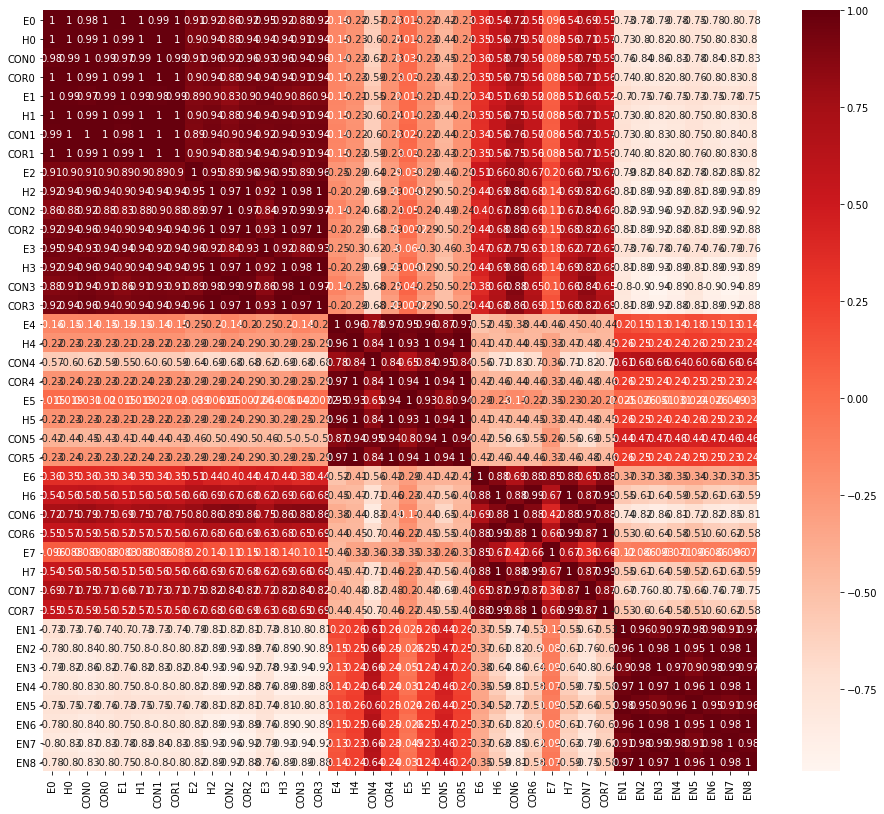

In [46]:
import seaborn as sns
plt.figure(figsize=(16,14))
corr= Together.corr()
ax=sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show
#ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right'); 

In [47]:
cor_target=abs(corr['EN8'])
#Selecting highly correlated features
relevant_features= cor_target[cor_target>0.9]
relevant_features

CON2    0.917631
EN1     0.966237
EN2     0.995467
EN3     0.972484
EN4     1.000000
EN5     0.959479
EN6     0.995467
EN7     0.975358
EN8     1.000000
Name: EN8, dtype: float64

In [48]:
# We delete the columns of non-relevant features

Together=Together.drop(Together.columns[[0,1, 2, 3, 4, 5, 6, 7, 8, 12, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]], axis=1)


In [49]:
Together

H2      CON2      COR2  ...       EN6       EN7       EN8
b   0.106773  0.242902  0.110277  ...  0.112186  0.115799  0.112792
b   0.098418  0.168637  0.096597  ...  0.115082  0.113646  0.116076
b   0.102903  0.205296  0.106735  ...  0.112727  0.105145  0.110547
b   0.101657  0.243706  0.104062  ...  0.115126  0.112424  0.116691
b   0.078504  0.156315  0.086877  ...  0.116380  0.120950  0.114492
..       ...       ...       ...  ...       ...       ...       ...
e   0.260283  0.461169  0.253705  ...  0.051370  0.046950  0.050122
e   0.326284  0.526410  0.333910  ...  0.081901  0.054501  0.080507
e   0.242023  0.451588  0.245421  ...  0.079605  0.065364  0.082359
e   0.280932  0.500755  0.279104  ...  0.065684  0.058090  0.066664
e   0.352952  0.564900  0.367331  ...  0.070833  0.054172  0.069855

[108 rows x 14 columns]

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
clustering=SpectralClustering(n_clusters=2, eigen_solver='arpack', n_components=3, random_state=42, n_init=10, gamma=1, affinity='rbf', eigen_tol=0.0, assign_labels='kmeans', degree=3, coef0=1, kernel_params=None, n_jobs=None).fit(Together)
labels=clustering.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [51]:
import numba as nb
import numpy as np
@nb.njit(fastmath=True,error_model="numpy",parallel=True)
def gaussian_kernel_2(X, X1, sigma):
    res=np.empty((X.shape[0],X1.shape[0]))
    for i in nb.prange(X.shape[0]):
        for j in range(X1.shape[0]):
            acc=0.
            for k in range(X.shape[1]):
                acc+=(X[i,k]-X1[j,k])**2/(2*sigma**2)
            res[i,j]=np.exp(-1*acc)
    return res

In [52]:
Matrix=Together.to_numpy()
print(Matrix.shape)
Matrix

(108, 14)


array([[0.10677339, 0.24290218, 0.11027733, ..., 0.11218607, 0.1157986 ,
        0.11279171],
       [0.09841847, 0.16863668, 0.09659696, ..., 0.11508211, 0.11364608,
        0.11607561],
       [0.10290318, 0.20529606, 0.106735  , ..., 0.11272657, 0.10514485,
        0.11054674],
       ...,
       [0.24202292, 0.45158816, 0.24542113, ..., 0.07960536, 0.06536447,
        0.08235869],
       [0.28093167, 0.50075548, 0.27910433, ..., 0.06568427, 0.05808965,
        0.06666395],
       [0.35295236, 0.56489958, 0.36733123, ..., 0.07083289, 0.05417237,
        0.06985509]])

In [53]:
# Similarity Matrix
sigma=1
SM=gaussian_kernel_2(Matrix, Matrix, sigma)
SM

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


array([[1.        , 0.99555754, 0.99913384, ..., 0.9206557 , 0.87865067,
        0.80073453],
       [0.99555754, 1.        , 0.99752844, ..., 0.88775764, 0.84095588,
        0.75883611],
       [0.99913384, 0.99752844, 1.        , ..., 0.91255432, 0.86928805,
        0.78938496],
       ...,
       [0.9206557 , 0.88775764, 0.91255432, ..., 1.        , 0.99460228,
        0.96420186],
       [0.87865067, 0.84095588, 0.86928805, ..., 0.99460228, 1.        ,
        0.98456639],
       [0.80073453, 0.75883611, 0.78938496, ..., 0.96420186, 0.98456639,
        1.        ]])

In [54]:
D = np.diag(np.sum(SM,axis=1))
D_half_inv = np.diag(1.0 / np.sqrt(np.sum(SM, axis=1)))
M = np.dot(D_half_inv, np.dot((D - SM), D_half_inv))

In [55]:
D

array([[ 99.46370369,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,  97.66228043,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,  99.05900367, ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ..., 100.57220529,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
         98.60180427,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,  93.8290219 ]])

In [56]:
D_half_inv 

array([[0.10026923, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.10118976, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.10047384, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.09971512, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.10070652,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.10323606]])

In [57]:
M

array([[ 0.98994608, -0.01010115, -0.01006571, ..., -0.00920505,
        -0.00887241, -0.00828872],
       [-0.01010115,  0.98976063, -0.0101418 , ..., -0.00895761,
        -0.00856973, -0.00792713],
       [-0.01006571, -0.0101418 ,  0.98990501, ..., -0.00914266,
        -0.00879578, -0.00818791],
       ...,
       [-0.00920505, -0.00895761, -0.00914266, ...,  0.99005689,
        -0.00998776, -0.00992568],
       [-0.00887241, -0.00856973, -0.00879578, ..., -0.00998776,
         0.9898582 , -0.01023609],
       [-0.00828872, -0.00792713, -0.00818791, ..., -0.00992568,
        -0.01023609,  0.98934232]])

In [58]:
(e_vals, e_vecs) = np.linalg.eigh(M) 
(e_vals, e_vecs)

(array([3.30014903e-16, 8.89729429e-01, 9.96996556e-01, 9.99225578e-01,
        9.99474443e-01, 9.99898978e-01, 9.99912045e-01, 9.99938461e-01,
        9.99948947e-01, 9.99960446e-01, 9.99987462e-01, 9.99990351e-01,
        9.99994543e-01, 9.99994739e-01, 9.99996069e-01, 9.99996867e-01,
        9.99996904e-01, 9.99997876e-01, 9.99998546e-01, 9.99998876e-01,
        9.99999312e-01, 9.99999354e-01, 9.99999632e-01, 9.99999740e-01,
        9.99999767e-01, 9.99999804e-01, 9.99999851e-01, 9.99999880e-01,
        9.99999889e-01, 9.99999906e-01, 9.99999944e-01, 9.99999952e-01,
        9.99999962e-01, 9.99999969e-01, 9.99999977e-01, 9.99999980e-01,
        9.99999983e-01, 9.99999987e-01, 9.99999990e-01, 9.99999990e-01,
        9.99999991e-01, 9.99999993e-01, 9.99999993e-01, 9.99999995e-01,
        9.99999995e-01, 9.99999996e-01, 9.99999997e-01, 9.99999997e-01,
        9.99999997e-01, 9.99999998e-01, 9.99999998e-01, 9.99999998e-01,
        9.99999998e-01, 9.99999998e-01, 9.99999999e-01, 9.999999

In [59]:
# Let U be the matrix containing the differents vectors as columns
U=e_vecs

In [60]:
U

array([[-0.09746511,  0.06798451, -0.07150617, ...,  0.00623745,
         0.01523527,  0.01042447],
       [-0.09657846,  0.09066535,  0.00772783, ...,  0.10568022,
        -0.08230354,  0.10702476],
       [-0.09726662,  0.07442763, -0.04775697, ...,  0.02414312,
         0.00431934,  0.00034534],
       ...,
       [-0.09800672, -0.05090951, -0.11182713, ...,  0.01417828,
        -0.01910228,  0.00335918],
       [-0.0970419 , -0.07997591, -0.06832456, ..., -0.03717069,
        -0.02541542,  0.01665918],
       [-0.09466413, -0.12213421,  0.11880274, ..., -0.01310214,
        -0.05904394, -0.00838218]])

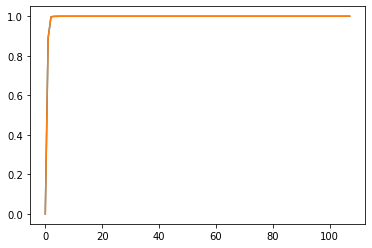

In [61]:
fig = plt.figure()
ax1 = plt.plot(e_vals)
plt.plot(e_vals)
#ax1.title.set_text('eigenvalues')
#i = np.where(e < 10e-6)[0]
#ax2 = plt.subplot(122)
#plt.plot(v[:, i[0]])
#fig.tight_layout()
plt.show()

In [62]:
e_vals_sorted_indices=np.argsort(e_vals)
e_vals_sorted=e_vals[e_vals_sorted_indices]
e_vals_sorted

array([3.30014903e-16, 8.89729429e-01, 9.96996556e-01, 9.99225578e-01,
       9.99474443e-01, 9.99898978e-01, 9.99912045e-01, 9.99938461e-01,
       9.99948947e-01, 9.99960446e-01, 9.99987462e-01, 9.99990351e-01,
       9.99994543e-01, 9.99994739e-01, 9.99996069e-01, 9.99996867e-01,
       9.99996904e-01, 9.99997876e-01, 9.99998546e-01, 9.99998876e-01,
       9.99999312e-01, 9.99999354e-01, 9.99999632e-01, 9.99999740e-01,
       9.99999767e-01, 9.99999804e-01, 9.99999851e-01, 9.99999880e-01,
       9.99999889e-01, 9.99999906e-01, 9.99999944e-01, 9.99999952e-01,
       9.99999962e-01, 9.99999969e-01, 9.99999977e-01, 9.99999980e-01,
       9.99999983e-01, 9.99999987e-01, 9.99999990e-01, 9.99999990e-01,
       9.99999991e-01, 9.99999993e-01, 9.99999993e-01, 9.99999995e-01,
       9.99999995e-01, 9.99999996e-01, 9.99999997e-01, 9.99999997e-01,
       9.99999997e-01, 9.99999998e-01, 9.99999998e-01, 9.99999998e-01,
       9.99999998e-01, 9.99999998e-01, 9.99999999e-01, 9.99999999e-01,
      

[Text(0, 0.5, '$\\lambda$'),
 Text(0.5, 0, 'index'),
 Text(0.5, 1.0, 'Sorted Eigenvalues Graph Laplacian')]

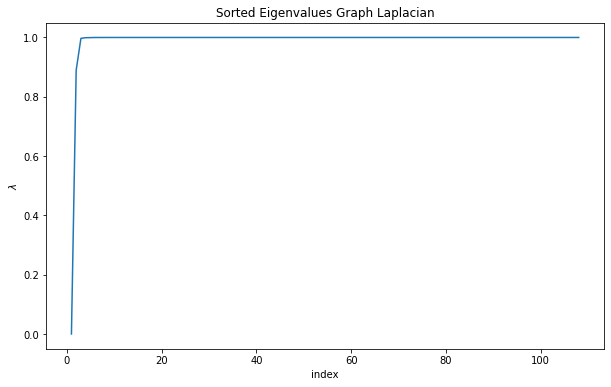

In [63]:
import seaborn as sns
fig, ax=plt.subplots(figsize=(10,6)) 
sns.lineplot(x=range(1, e_vals_sorted_indices.size+1), y=e_vals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$')

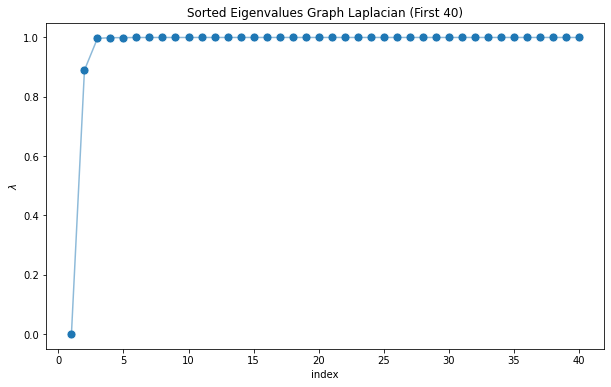

In [64]:
index_lim=40
fig, ax=plt.subplots(figsize=(10,6)) 
sns.scatterplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, e_vals_sorted_indices[: index_lim].size+1), y=e_vals_sorted[: index_lim], alpha=0.5, ax=ax)
#ax.axvline(x=3, color=sns_c[3], label='zero eigenvalues', linestyle='--')
ax.legend
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [65]:
smallest_e_vals_index=np.argwhere((8.94502167e-01<e_vals)&(e_vals<9.98104856e-01))
e_vals[smallest_e_vals_index]

array([[0.99699656]])

In [66]:
proj_df=pd.DataFrame(e_vecs[:, smallest_e_vals_index.squeeze()])
proj_df.columns=['v_'+str(c+1) for c in proj_df.columns]
proj_df.head()

v_1
0 -0.071506
1  0.007728
2 -0.047757
3 -0.087938
4  0.012961

In [67]:
from sklearn.cluster import KMeans
inertias=[]
k_candidates=range(1,10)
for k in k_candidates:
  k_means=KMeans(random_state=42, n_clusters=k)
  k_means.fit(proj_df)
  inertias.append(k_means.inertia_)

[Text(0, 0.5, 'inertia'), Text(0.5, 0, 'k'), Text(0.5, 1.0, 'Inertia K-Means')]

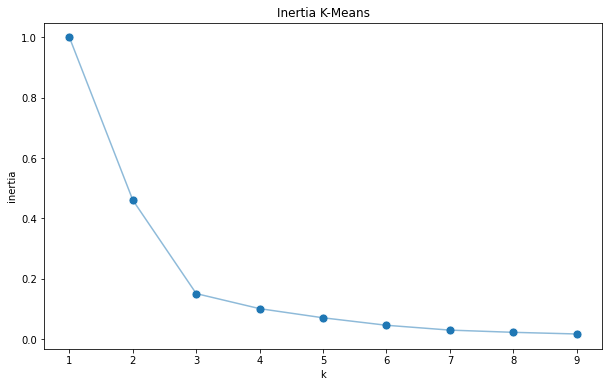

In [68]:
fig, ax=plt.subplots(figsize=(10,6))
sns.scatterplot(x=k_candidates, y=inertias, s=80, ax=ax)
sns.lineplot(x=k_candidates, y=inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k')

In [69]:
def run_k_means(df, n_clusters):
  k_means=KMeans(random_state=25, n_clusters=n_clusters)
  k_means.fit(df)
  cluster=k_means.predict(df)
  return cluster

cluster=run_k_means(proj_df, n_clusters=2)  
cluster

array([1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0],
      dtype=int32)

Text(0.3, 0.92, 'small Eigenvectors Cluster')

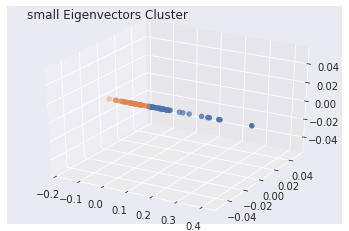

In [70]:
sns.set_style('darkgrid',)
sns.set_palette(palette='deep')
sns_c=sns.color_palette(palette='deep')
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure()
ax=fig.add_subplot(111, projection='3d')
ax.scatter(xs=proj_df['v_1'], ys=0, zs=0, c=[{0: sns_c[0], 1: sns_c[1], 2: sns_c[2]}.get(c) for c in cluster]
)
ax.set_title('small Eigenvectors Cluster', x=0.3)

(array([43.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 37.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

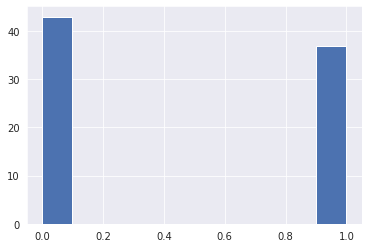

In [71]:
Table=[]
True_labels=[]
for i in range(53):
  True_labels.append(0)
for i in range(55):
  True_labels.append(1) 
for i in range(108):
  if True_labels[i]==cluster[i]:
    Table.append(cluster[i])  
Table
plt.hist(Table)

In [72]:
count1=0
count2=0
count3=0
count4=0
True_labels=[]
for i in range(53):
  True_labels.append(0)
for i in range(55):
  True_labels.append(1) 
for i in range(53):
  if True_labels[i]==cluster[i]:count1+=1
  else: 
    count2+=1
for i in range(53, 108):
  if True_labels[i]==cluster[i]:count3+=1
  else:
     count4+=1
print(count1)  
print(count2)
print(count3)   
print(count4)
print('Number of Bad images well classified on 53 is', count1)   
print('Number of Empty images well classified on 55 is', count3)    

43
10
37
18
Number of Bad images well classified on 53 is 43
Number of Empty images well classified on 55 is 37


In [73]:
Accuracy=(count1+count3)*100/107
Accuracy_for_Bad=(53/53)*100
Accuracy_for_Empty=(55/55)*100
print('Total Accuracy', Accuracy)
print('Accuracy for Good images', Accuracy_for_Bad)
print('Accuracy for Empty images', Accuracy_for_Empty)

Total Accuracy 74.76635514018692
Accuracy for Good images 100.0
Accuracy for Empty images 100.0
